In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
%%html
<style>
table td {text-align:left !important}
table th {text-align:center !important}
</style>

In [3]:
from matplotlib import rcParams
import matplotlib as mpl

#svg.fonttype: path

blue = '#3498DB'
gray = '#95A5A6'
red = '#E74C3C'
dark_gray = '#34495E'
green = '#2ECC71'
purple = '#9B59B6'
flatui = [blue, gray, red, dark_gray, green, purple]

#rcParams['axes.prop_cycle'] = cycler('color', [blue, gray, red, dark_gray, green, purple])

# Patches
mpl.rc('patch', 
       linewidth=0.5, 
       facecolor=dark_gray, 
       edgecolor='w', 
       force_edgecolor=True, 
       antialiased=True)    
  
# Figure
mpl.rc('figure', 
       figsize= (15, 9),
       dpi= 200,
       facecolor='w', 
       edgecolor='w', 
       titlesize='xx-large',
       titleweight=700)

# Grid
mpl.rc('grid', 
       color=dark_gray,
       alpha=0.5, 
       linewidth=0.5, 
       linestyle='-')

# Axes
mpl.rc('axes', 
       facecolor='w',
       edgecolor=dark_gray,
       linewidth=0.5,
       grid=True,
       titlesize='large',
       labelsize='large',
       labelcolor=dark_gray,
       axisbelow=True)

mpl.rc('axes.spines',
       right=False,
       top=False)

# Ticks
mpl.rc('xtick', 
       direction='out',
       color=dark_gray)

mpl.rc('xtick.major', 
       size=0.0)

mpl.rc('xtick.minor', 
       size=0.0)

mpl.rc('ytick', 
       direction='out',
       color=dark_gray)

mpl.rc('ytick.major', 
       size=0.0)

mpl.rc('ytick.minor', 
       size=0.0)

mpl.rc('legend', 
       frameon=False,
       numpoints=1,
       scatterpoints=1)

mpl.rc('font', 
       size=13,
       weight=400,
       family='sans-serif')

rcParams['font.sans-serif']: ['Helvetica', 'Verdana', 'Lucida Grande']

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns

## __The Problem to Be Solved__

This project was inspired by the Green Bay Packers, an NFL team that has relied heavily upon a draft and develop philosophy, particularly with respect to their Cornerbacks and Safeties (together, '__Defensive Backs__', or, '__DBs__').  This philosphy involves drafting talented (but much less expensive) players out of college, signing them to three or four year contracts and developing their abilities, rather than paying the higher contract prices of more experienced players who have proven records in the NFL.

Drafting and developing DBs worked well for the Packers for a number of years, until it didn't.  Some of the players they developed into exceptional DBs left the Packers to play for other teams that were willing to pay more  after their initial contracts with the Packers expired.  The Packers adapted for a few years, because they had good, younger players coming up behind those that left.  But, at some point, around 2015 or so, the younger players weren't developing and putting in the kinds of performances needed for a top-notch defense.  The failure to identify players who would become successful at DB hurt the Packers win-loss record and also impacted the organization financially.

Being a successful NCAA player doesn't necessarily translate into becoming a successful NFL player.  The knowledge, skills and abilities needed to be successful in the NFL are different enough that some excellent NCAA players are unable to make the adjustment and never become excellent players in the NFL.

I designed this project to see if I could identify metrics of success through machine learning that might help the Packers identify those players who were more likely to successfully make the transformation from the NCAA to the NFL, for as long as the Packers insist on relying upon draft and develop.  I've defined success as having played on an NFL teams' 53-man roster for at least three years.  The reasoning for this is that if a player has earned a spot on the tight roster for at least three years, many experts have determined that he's at least good enough to play in the NFL and players are typically given two full years to make the transition to the NFL. 

As I've argued, NCAA game statistics are part of the equation.  Excellent play in the NCAA is definitely correlated with the ability to make it in the NFL.  But I also believe that there are other factors, some of which may be identifiable and measurable, that may indicate a player's ability to adapt to the needs of the NFL.

In accordance with this thesis, I've placed an emphasis on factors other than game statistics.  Game statistics are still pieces of the puzzle, but I'd like to understand how important they are and how important other aspects of a player are.  The next section examines the requirements of the position and the following section describes the data I was able to pull together that addresses a player's ability to meet these requirements.

<br>
<br>

## __Requirements of the Position__

Defensive Backs' primary responsibility is to guard against the pass by covering the opposing offense's wide receivers.  This requires them to be able to run fast, jump high, maneuver quickly and have some instincts for finding a ball in the air while doing so.  Being sure-handed is also helpful if they are able to put themselves in positions to intercept the ball.  

Defensive Backs must also be big enough and strong enough to make tackles if the pass is completed and on the occasions when they must tackle a 230+-pound running back who has made it through the Defensive Line and past the Linebackers.  And, they must be durable enough to avoid injuries while doing so.

Finally, they must be 'football smart' enough to learn their responsibilities for each defensive play and to read opposing offenses' formations to be able to anticipate each play.

In comparison to other positions, DBs rely more heavily on raw athleticism and less on football knowledge and experience.  As evidence of this, it is not uncommon for a player to move from wide receiver to DB and/or back.  Both positions rely on the same types of athleticism.  It is also not uncommon for an NCAA football coach to recruit a DB from another sport, such as Track or Basketball; the athleticism that made them successful at these other sports may outweigh years of experience playing football in middle school, high school and early college.  This is seldom the case for skill positions, such as Quarterback, Running Back, Linebacker or even Offensive or Defensive Line.

It should be noted that Safeties, Free Safeties and Strong Safeties also occasionally rush the Quarterback and have greater responsibility in stopping the run game.  As such, they tend to be slightly bigger than pure Cornerbacks.  Players often shift between DB positions over their careers.  Some NCAA teams made the distinction between the positions by listing some players as 'SS', 'FS', 'S', or 'CB', but the vast majority of NCAA teams listed all players as 'DB' throughout most of the years covered in the data collected (2005 - 2017).

It should also be noted that defenses change over time and, with that, the balance of attributes that makes for successful players may also change slightly.  For instance, defenses have been emphasizing speed increasingly in recent years.

<div>
  <table>
    <thead>
      <tr>
        <th>Athleticism</th>
        <th>Football Intelligence</th>
        <th>Physical Attributes</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>accelerate quickly and run fast</td>
        <td>learn responsibilities on each defensive play</td>
        <td>height</td>
      </tr>
      <tr>
        <td>jump high</td>
        <td>read the offense</td>
        <td>weight</td>
      </tr>
      <tr>
        <td>ability to change directions quickly</td>
        <td>find the football while jumping and keeping track of the offensive player</td>
        <td>durability</td>
      </tr>
    </tbody>
  </table>
</div>

<br>
<br>

## __The Path to Success__
According to an [article from CBS News](https://www.cbsnews.com/news/the-odds-of-playing-college-sports/), the odds that a high school senior football player will eventually be drafted by an NFL team are 0.08%.  One in 16 high school senior football players will play college football at some level, some of those players will stop playing during college, and, for those who do continue to play through their senior year of college, only 1 in 50 will be drafted by an NFL team.

There are several possible paths to the NFL, but the typical path involves being a high school standout, getting a full scholarship to play for an NCAA Division I team, gaining enough recognition to be invited to participate in the NFL Combine and eventually being drafted by an NFL team in the Spring of a player's senior year of college.  

Alternatively, a player may stand out at a Division II or even a Division III school, may attend a college Pro Day instead of the Combine and may even play in the Canadian Football League for a year or two before making their way to the NFL.  And, a player not drafted may may opt to walk-on to a team's Training Camp, a period of time prior to the start of each season where players warm-up for the season, learn new plays and many try to prove that they deserve a place at or near the top of the team's depth chart.  

At the beginning of each season, teams are allowed 90-man rosters throughout Training Camp, but the rosters must be trimmed to 53 prior to the first game of the regular season.  Some of those cut may try out for other teams, others may be asked to join the team's Practice Squad.  A player on the Practice Squad may be promoted to the 53-man roster if a player ahead of him on the team's depth chart suffers a season-ending injury.  Either way, he'll have another chance to prove himself at the following season's Training Camp.

<br>
<br>

## __Data: What Would Be Useful?__

Useful data can be broken into three categories:
1. __football experience__
    - number of years played
    - quality of the teams played on
    - performance, as measured by game statistics
2. __raw athleticism__
    - speed and acceleration
    - vertical leap
    - ability to change directions / dexterity / footwork
    - ability to catch
3. __biographical information__ 
    - height
    - weight
    - birth date
    - state in which the player grew up
    - ability to learn a defense and study an offense, which could be measured by academic performance
    
The state in which the player grew up is relevant because some states tend to place a greater emphasis on football.  Also, Southern states often have organized football leagues 9 - 12 months a year, whereas leagues in Northen states tend to be limited to 3-4 months in Autumn.

Birth date may be relevant, according to a theory set forth by Malcolm Gladwell.  In his book, _Outliers_, Mr. Gladwell makes a persuasive argument that players in all sports who are older than their peers growing up tend to be significantly more mentally, emotionally and physically mature than their peers, and thus get more playing time and build more confidence.  

For example, a school district may recommend than students turning 7 prior to January 1st enroll in first grade.  Therefore, students born in early January, just after the cut-off date, could be 10-11 months more mature than their peers.

It's a compelling argument, but it's difficult to apply en masse, as there is no federally-mandated cut-off date.  Instead, each school district across the country sets its own date.  Furthermore, the cut-off date is only a recommendation, so, parents can decide to hold their children back for a year voluntarily.  Checking for each of these factors for the 10,000+ NCAA players in this pool is beyond the scope of this project.

<br>
<br>

## __Data: What is Available?__

__Football Experience__:  High school statistics are not widely available and NFL statistics are irrelevant because I'm approaching this as a recruiter, looking for talent at the college level to draft and develop.  So, NCAA game statistics are the obvious choice.  

I decided that comparing players who played in Divison II or Division III against players in Division I was unfair and not useful.  That's not to say that game statistics for Division II and III players are irrelevant, but, in a machine learning exercise, DII & DIII statistics would have to be discounted at some rate to provide for the difference in the speed of the game and the skills of the players at the different levels.

__Raw Athleticism__:  The NFL Scouting Combine is an invitation-only event that is held in Indianapolis every year in February or March.  Results from the Combine are ideal for testing raw athleticism.  In particular, the 40-yard dash, 3 cone drill, vertical leap and shuttle drills test a player's speed, acceleration, agility and leaping ability.  The downside to using this data is that the event is invitation-only, and not all players who play in the NFL participate in the Combine.  As a result, this data is not available for all NCAA Division I players, or, for all NFL players.

__Biographical Data__:  Each NCAA Division I player's height, weight and home state are available in the NCAA date available from cfbstats.com and described more fully below.

<br>
<br>

## __Data Collection and Cleaning__

### __NCAA Bios__ - Importing .csvs from cfbstats.com
---
I found a collection of .csv files for NCAA players from 2005 - 2013 hosted on someone's Google Drive from a link in a subreddit.  Later, I learned that that data set was also posted on [Kaggle](https://www.kaggle.com/mhixon/college-football-statistics), and that it was initially an open database hosted at [cfbstats.com](http://www.cfbstats.com).  That database disappeared behind a (very expensive) paywall in 2014.  The data set posted on Kaggle had been downloaded by someone just before the site put up the paywall in 2014.

I wrote to cfbstats.com, explained that I was a student and that I wanted to use their data for a data science project.  I asked if they had acadmeic rates, but never heard back from them.  It wouldn't be unreasonable to assume that even the data from 2005 - 2013 improved once access to that data disappeared behind the paywall.  Having access to that data would have saved me a lot of time and could have provided more complete and possibly more reliable data.  If I were actually getting paid for this work by an NFL team, I would have pushed them to purchase access to this data.

This was the most complete source of NCAA data I found.  It contained not only game stats, but also biographical information, including height, weight and home state, which figured to be useful for the reasons stated above.  My first concern was that it only covered players from 2005 - 2013.  I had already set the bar for success at 3+ years in the NFL, which meant that in order to have played at least 3 years in the NFL, a player would have left college after the 2014 season.  Despite the fact that this data set did not contain game data for the NCAA 2014 season, I decided to proceed with it.

The .csvs for this data were split into teams, players and game stats, and each of these was split into one .csv file per year.  The .csvs with the prefix 'player' contained biographical information on each player, as well as a column labeled 'Player Code' which acted as an id to tie the biographical information to the player's game stats for that year, contained in the files prefixed with 'games':

![File Structure](05_images/cfbstats.com_data_structure.png)

#### Issues:
__1. Two ids for a single player__: After concatenating this data into a single DataFrame, I discovered that some of the players' NCAA careers had been mistakenly split into two or more entries; one id had been assigned to a year or two of a player's career and another id to the remainder of the same player's career, where there should have been a one-to-one relationship between id and player + player stats.  I went through, team-by-team and player-by-player and corrected this, not only by using pandas' .duplicated() function, but also by looking through each name for slight variations on the name.  
__2. Aggregated statistics were inaccurate:__ Within a given year, each player's stats were provided on a game-by-game basis, which I aggregated to get total stats for the year.  After some initial Exploratory Data Analysis (__'EDA'__) I found these stats to be consistently lower than the stats available on the ncaa.org website.

#### NCAA Biographical Information Features

<div>
  <table>
    <thead>
      <tr>
        <th>Statistic</th>
        <th>Description</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td><b>player_id</b></td>
        <td>'Player Code' as downloaded; <b>should</b> have been a unique id for each player</td>
      </tr>
      <tr>
        <td><b>player</b></td>
        <td>player's first and last name</td>
      </tr>
      <tr>
        <td><b>team</b></td>
        <td>NCAA Division I school player attended</td>
      </tr>
      <tr>
        <td><b>class</b></td>
        <td>unused</td>
      </tr>
      <tr>
        <td><b>position</b></td>
        <td>player's officially listed position</td>
      </tr>
      <tr>
        <td><b>height</b></td>
        <td>official NCAA listed height</td>
      </tr>
      <tr>
        <td><b>weight</b></td>
        <td>official NCAA listed weight</td>
      </tr>
      <tr>
        <td><b>home_town</b></td>
        <td>town player lived in prior to college</td>
      </tr>
      <tr>
        <td><b>home_state</b></td>
        <td>state player lived in prior to college</td>
      </tr>
      <tr>
        <td><b>home_country</b></td>
        <td>player's country of origin</td>
      </tr>
      <tr>
        <td><b>last_school</b></td>
        <td>last high school attended prior to college</td>
      </tr>
      <tr>
        <td><b>first</b></td>
        <td>first name</td>
      </tr>
      <tr>
        <td><b>last</b></td>
        <td>last name</td>
      </tr>
      <tr>
        <td><b>stats_name</b></td>
        <td>player name as it appears in the NCAA Stats DataFrame - used to merge the two DataFrames</td>
      </tr>
    </tbody>
  </table>

</div>

#### Stats on Stats: NCAA Biographical Data

<div>
  <table>
    <thead>
      <tr>
        <th>Statistic</th>
        <th>#</th>
        <th>Description</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td><b>Players</b></td>
        <td>7,521</td>
        <td>DBs from an NCAA Division I school with biographical data between 2005 and 2013</td>
      </tr>
      <tr>
        <td><b>In Study</b></td>
        <td>6,051</td>
        <td>DBs who had matching NCAA game stats and were included in this project</td>
      </tr>
    </tbody>
  </table>
</div>

<br>
<br>

### __NCAA Stats__ - Using BS4 to scrape stats from the web
---
After an appropriate period of mourning over the loss of a single, clean data source, I decided I had to scrape the [ncaa.org website](https://web1.ncaa.org/stats/StatsSrv/careersearch).  I used BeautifulSoup4 to write a scraper in VS Code that would first query a team, scrape the team's rosters for DBs from 2005 - 2017 to build a unique set of players and their ids, then query each player's id for the player's career stats.  

[ncaa_scraper.py](sausage_factory/ncaa_scraper.py)

I turned each player's career into a single row of a DataFrame by creating a set of columns to represent statistics for each potential year of a player's career - Redshirt Freshman, Freshman, Sophomore, Junior and Senior and collected of a team's players into a single DataFrame.  Again, I needed to go through each team to look for players who had been assigned multiple ids and then join their entries into a single entry.  The game stats for each year are as follows:

#### NCAA Stats Features

<div>
  <table>
    <thead>
      <tr>
        <th>Statistic</th>
        <th>Description</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td><b>games</b></td>
        <td>number of games played</td>
      </tr>
      <tr>
        <td><b>tackles_solo</b></td>
        <td>solo tackles</td>
      </tr>
      <tr>
        <td><b>tackles_asst</b></td>
        <td>assisted tackles</td>
      </tr>
      <tr>
        <td><b>tfl_solo</b></td>
        <td>solo tackles that resulted in a loss of yards on the play</td>
      </tr>
      <tr>
        <td><b>tfl_asst</b></td>
        <td>assisted tackles that resulted in a loss of yards on the play</td>
      </tr>
      <tr>
        <td><b>tfl_yards</b></td>
        <td>total number of yards lost by the offense for solo and assisted tackles for loss</td>
      </tr>
      <tr>
        <td><b>sacks_solo</b></td>
        <td>solo sacks; solo tackles of the Quarterback for a loss</td>
      </tr>
      <tr>
        <td><b>sacks_asst</b></td>
        <td>sack assists; assisted tackles of the Quarterback for a loss</td>
      </tr>
      <tr>
        <td><b>sacks_yards</b></td>
        <td>total number of yards lost by the offense for solo and assisted sacks</td>
      </tr>
      <tr>
        <td><b>int</b></td>
        <td>interceptions</td>
      </tr>
      <tr>
        <td><b>int_yards</b></td>
        <td>yards gained following an interception</td>
      </tr>
      <tr>
        <td><b>int_td</b></td>
        <td>touchdowns scored off of an interception</td>
      </tr>
      <tr>
        <td><b>fum</b></td>
        <td>fumbles recovered</td>
      </tr>
      <tr>
        <td><b>fum_yards</b></td>
        <td>yards gained following a fumble recovery</td>
      </tr>
      <tr>
        <td><b>fum_td</b></td>
        <td>touchdowns scored off of fumble recoveries</td>
      </tr>
      <tr>
        <td><b>ffum</b></td>
        <td>forced fumbles; number of fumbles caused by the player</td>
      </tr>
      <tr>
        <td><b>safety</b></td>
        <td>tackles of an opponent in the opponent's end zone</td>
      </tr>
      <tr>
        <td><b>punt_ret</b></td>
        <td>punts returned</td>
      </tr>
      <tr>
        <td><b>punt_ret_yards</b></td>
        <td>yards gained on punt returns</td>
      </tr>
      <tr>
        <td><b>punt_ret_td</b></td>
        <td>touchdowns scored on punt returns</td>
      </tr>
      <tr>
        <td><b>kick_ret</b></td>
        <td>kick offs returned</td>
      </tr>
      <tr>
        <td><b>kick_ret_yards</b></td>
        <td>yards gained on kick off returns</td>
      </tr>
      <tr>
        <td><b>kick_ret_td</b></td>
        <td>touchdowns scored on kick off returns</td>
      </tr>
      <tr>
        <td><b>total_points</b></td>
        <td>total number of points scored by the player from safeties, touchdowns from interception returns, fumble returns, punt returns and kick off returns</td>
      </tr>
    </tbody>
  </table>

</div>

#### Stats on Stats: NCAA Stats

<div>
  <table>
    <thead>
      <tr>
        <th>Statistic</th>
        <th>#</th>
        <th>Description</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td><b>Players</b></td>
        <td>10,536</td>
        <td>DBs played at an NCAA Division I school between 2005 and 2017</td>
      </tr>
      <tr>
        <td><b>In Study</b></td>
        <td>6,051</td>
        <td>DBs who had matching biographical info and were included in this project</td>
      </tr>
    </tbody>
  </table>
</div>

#### Issues:
__1. Two ids for a single player__: After concatenating this data into a single DataFrame, I discovered that, like the cfbstats.com data above, some of the players' NCAA careers had been mistakenly split into two or more entries; one id had been assigned to a year or two of a player's career and another id to the remainder of the same player's career, where there should have been a one-to-one relationship between id and player + player stats.  I went through, team-by-team and player-by-player and corrected this, not only by using pandas' `.duplicated()` function, but also by looking through each name for slight variations on the name.  
<br>
__2. Class years overlapped__: Many players had mislabeled classes.  For example, a player being listed as a junior for two years' worth of stats.  I created a class with some methods to correct Issue #1 above and to deduplicate duplicated classes in an efficient and accurate fashion.

[NCAA Deduper Notebook](sausage_factory/ncaa_deduper.ipynb)


<br>
<br>

### __NFL Scouting Combine__ - Importing from .csv
---

The NFL Scouting Combine is the ideal source for data on players' raw athleticism.  However, as noted elsewhere, it is an invitation-only event, and only a very small proportion of players are invited each year.  I downloaded Combine data from a [single source](https://www.pro-football-reference.com/draft/2018-combine.htm) in .csv format.  I performed some manipulations to split and move data and rename some columns, but had no issues with this data set.

#### Cleaning
I took some simple steps to:
- drop unnecessary columns
- break a single column containing draft information into `draft_round`, `draft_pick` and `draft_team` columns
- change the format of the height column from 5-11 to 71 (feet-inches to inches)

[Combine Cleaner Notebook](sausage_factory/Clean_Combine.ipynb)


#### Combine Features

<div>
  <table>
    <thead>
      <tr>
        <th>Statistic</th>
        <th>Description</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td><b>player</b></td>
        <td>player's first and last name - will be used to merge the DataFrame from different sources.</td>
      </tr>
      <tr>
        <td><b>draft_team</b></td>
        <td>team that drafted the player out of college</td>
      </tr>
      <tr>
        <td><b>draft_round</b></td>
        <td>round in which player was selected</td>
      </tr>
      <tr>
        <td><b>draft_pick</b></td>
        <td>player was the nth pick overall in that year's draft</td>
      </tr>
      <tr>
        <td><b>draft_position</b></td>
        <td>position the player was drafted to play</td>
      </tr>
      <tr>
        <td><b>college</b></td>
        <td>college the player attended - used with the player's name to merge with other data sources</td>
      </tr>
      <tr>
        <td><b>draft_height</b></td>
        <td>player's official height at the time of the draft</td>
      </tr>
      <tr>
        <td><b>draft_weight</b></td>
        <td>player's official weight at the time of the draft</td>
      </tr>
      <tr>
        <td><b>forty</b></td>
        <td>40-yard dash time</td>
      </tr>
      <tr>
        <td><b>vertical</b></td>
        <td>vertical leap</td>
      </tr>
      <tr>
        <td><b>bench_reps</b></td>
        <td>number of repetitions of bench press at 225 pounds</td>
      </tr>
      <tr>
        <td><b>broad_jump</b></td>
        <td>broad jump distance</td>
      </tr>
      <tr>
        <td><b>three_cone</b></td>
        <td>time in 3 cone drill, use to evaluate agility, quickness and fluidity of movement</td>
      </tr>
      <tr>
        <td><b>shuttle</b></td>
        <td>time in the short shuttle (also called the 20-yard shuttle), used to evaluate the quickness and change-of-direction ability</td>
      </tr>
    </tbody>
  </table>

</div>

#### Stats on Stats: Combine

<div>
  <table>
    <thead>
      <tr>
        <th>Stat</th>
        <th>#</th>
        <th>Description</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td><b>Participants</b></td>
        <td>632</td>
        <td>DBs participated in the Combine from 2005 - 2015</td>
      </tr>
      <tr>
        <td><b>Drafted</b></td>
        <td>436</td>
        <td>DBs who participated in the Combine were eventually drafted by an NFL team</td>
      </tr>
      <tr>
        <td><b>In study</b></td>
        <td>287</td>
        <td>DBs who atteneded the Combine were included in this project</td>
      </tr>
    </tbody>
  </table>
</div>

<br>
<br>

### __NFL__ - Accessing Data Using an API
---
I really only needed the number of seasons a player played in the NFL, but I collected a few additional biographical statistics while I was accessing the API.  I chose the sportradar.com API because it contained the information I needed along with some additional biographical information and it appeared to be complete and accurate.  

Their database is behind a paywall, but I was able to sign up for a trial.  When it became apparent that I needed more data than the trial terms would allow, I contacted them and they graciously raised my limits to allow me to download the information I needed.

As with the NCAA statistics, I first queried the teams for their rosters to get ids for each player, then used those ids to access players individually.

#### Cleaning
I took some simple steps to:
- break birthdate out into three separate columns, 
- concatenate the player's preferred name with the last name, 
- create a separate column containing the state the player's high school was in,
- count the number of seasons played in the NFL,
- take the `.min()` of seasons played to get value for the 'rookie' column,
- take the `.max()` of seasons played to get value for the 'last_season' column,
- added a column to insert the exact spelling of the player's name used in the NCAA DataFrame to merge the two

[NFL Data Cleaner Notebook](02_cleaning/Clean_NFL.ipynb)

#### Issues
There were no issues, once the limits of the trial were lifted.

#### NFL Features

<div>
  <table>
    <thead>
      <tr>
        <th>Statistic</th>
        <th>Description</th>
      </tr>
    </thead>
      <tr>
        <td><b>player</b></td>
        <td>player's first and last name, used to merge with other data sets</td>
      </tr>
      <tr>
        <td><b>last_name</b></td>
        <td>last name</td>
      </tr>
      <tr>
        <td><b>first_name</b></td>
        <td>First Name</td>
      </tr>
      <tr>
        <td><b>pref_name</b></td>
        <td>preferred name, where a player's first name is not his preferred name, used to compose 'player'</td>
      </tr>
      <tr>
        <td><b>height</b></td>
        <td>official NFL listed height</td>
      </tr>
      <tr>
        <td><b>weight</b></td>
        <td>official NFL listed weight</td>
      </tr>
      <tr>
        <td><b>birth_date</b></td>
        <td>date of birth</td>
      </tr>
      <tr>
        <td><b>birth_year</b></td>
        <td>year of birth</td>
      </tr>
      <tr>
        <td><b>birth_month</b></td>
        <td>month of birth</td>
      </tr>
      <tr>
        <td><b>birth_day</b></td>
        <td>day of birth</td>
      </tr>
      <tr>
        <td><b>hs_state</b></td>
        <td>state in which player attended high school</td>
      </tr>
      <tr>
        <td><b>high_school</b></td>
        <td>name of high school attended</td>
      </tr>
      <tr>
        <td><b>college</b></td>
        <td>college attended - used to merge with other DataFrames</td>
      </tr>
      <tr>
        <td><b>season_count</b></td>
        <td>count of seasons played in the NFL</td>
      </tr>
      <tr>
        <td><b>rookie</b></td>
        <td>first year in the NFL</td>
      </tr>
      <tr>
        <td><b>last_season</b></td>
        <td>year last played in the NFL</td>
      </tr>
      <tr>
        <td><b>seasons</b></td>
        <td>list of all seasons played in the NFL</td>
      </tr>
      <tr>
        <td><b>ncaa_name</b></td>
        <td>player name in combined NCAA bios and stats DataFrame, used to merge with that DataFrame</td>
      </tr>
    </tbody>
  </table>

</div>

#### Stats on Stats: NFL

<div>
  <table>
    <thead>
      <tr>
        <th>Stat</th>
        <th>#</th>
        <th>%</th>
        <th>Description</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td><b>Players</b></td>
        <td>1,308</td>
        <td> - </td>
        <td>DBs played in the NFL from 2006 - 2017</td>
      </tr>
      <tr>
        <td><b>In study</b></td>
        <td>519</td>
        <td>8.577%</td>
        <td>DBs who played in the NFL and were included in this project</td>
      </tr>
      <tr>
        <td><b>NFL Success</b></td>
        <td>296</td>
        <td>4.892%</td>
        <td>DBs who played at least 3 years and are in the final DataFrame</td>
      </tr>
    </tbody>
  </table>
</div>

## __Merging__

While I think that the Combine data is going to be very informative, only a very small percentage of NCAA players are invited to participate.  There is no way to collect additional data or to impute missing values, so, I decided to treat the Combine data separately, rather than discarding it altogether.  As a result, I have two datasets, as described below.

__NCAA + NFL Dataset__
The first dataset contains NCAA biographical data, game statistics and NFL player data for those who made it to the NFL.  Of the 1,308 players in the NFL dataset, 678 were not found in the NCAA dataset, which is constrained by NCAA players who attended a Division 1 school between 2008 and 2013.  Of the 678 NFL players that weren't in the NCAA dataset, I found that 242 of them did not play at a D1 school, which left 436 players missing.  NFL players whose rookie seasons occurred prior to 2009 would be too old to have NCAA biographical data, so, I also eliminated those 374 players, which left 62 players from the NFL dataset who were not included in the NCAA dataset.  

As shown in the _Stats on Stats: NFL_ table above, only 8.577% of the 6,051 players tracked in the NCAA dataset ever played in the NFL.  Among those, slightly more than half (57%) played at least three years in the NFL and are considered successes for purposes of this problem.  In sum, just under 5% of the players who played in the NCAA played at least three years in the NFL.  As a result, I have chosen to treat this as an imbalanced dataset and to measure performance of various binary classification algorithms using precision, recall and F1 scores.

![data](05_images/data_path.png)

__Combine + NFL Dataset__


"A committee of selectors chooses which players are invited to combine. None of the selectors has ties to any particular conference, university, program or player representation agency, although coaches and agents routinely lobby for players to be invited. 
Typically, the number of those players invited comes out to around 325.

Roughly one-third of the players who are invited to the combine aren't drafted. A couple dozen players who aren't invited are drafted each year. From 1999 to 2007, nearly 190 players who weren't invited to the combine were drafted. Dozens more non-invitees latched on to teams as free agents.

The main reasons players don't make the combine are injuries, having non-NFL-type measurables, a lack of production and playing against lesser competition."

    - http://www.nfl.com/combine/story/09000d5d80ec172d/article/no-combine-doesnt-mean-no-chance-for-players-to-make-the-nfl

## __Exploratory Data Analysis__

### __NCAA Dataset__

In [4]:
# import the NCAA + NFL DataFrame, cleaned and ready for EDA
df = pd.read_csv('~/Documents/Data Science/Capstone 1/data/CLEAN/MERGED_ncaa+nfl.csv', index_col = 0)

# display as integers
pd.options.display.float_format = '{:.0f}'.format

# get description for all players in the NCAA+NFL DataFrame
df.describe()

,height,weight,ncaa_yr_ct,games,tackles_solo,tackles_asst,tfl_solo,tfl_asst,tfl_yards,sacks_solo,sacks_asst,sacks_yards,int,int_yards,int_td,fum,fum_yards,fum_td,ffum,safety,punt_ret,punt_ret_yards,punt_ret_td,kick_ret,kick_ret_yards,kick_ret_td,total_points,birth_month
count,6051,6051,6051,6051,6051,6051,6051,6051,6051,6051,6051,6051,6051,6051,6051,6051,6051,6051,6051,6051,6051,6051,6051,6051,6051,6051,6051,516
mean,71,191,3,25,42,23,2,1,9,0,0,3,2,23,0,1,2,0,1,0,1,11,0,2,44,0,3,6
std,2,14,1,18,49,30,4,2,17,1,0,9,3,49,0,1,11,0,1,0,7,70,0,9,215,0,10,3
min,65,146,0,0,0,0,0,0,0,0,0,0,0,-25,0,0,-9,0,0,0,0,-14,0,0,-8,0,0,1
25%,70,181,2,7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
50%,71,190,4,25,20,11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
75%,73,200,4,42,72,37,3,1,12,0,0,0,2,25,0,1,0,0,1,0,0,0,0,0,0,0,0,9
max,78,241,5,58,286,202,37,24,198,17,6,144,21,494,4,17,147,3,12,2,125,1752,7,144,3615,6,252,12


#### Stats for the 519 Players Who Played in the NFL

In [5]:
# create a DataFrame for those who played in the NFL and get its description
nfl = df[df.in_nfl == 1]

nfl[['height', 'weight', 'ncaa_yr_ct', 'games', 'tackles_solo', 'tackles_asst', 'tfl_solo', 'tfl_asst', 'tfl_yards', 'sacks_yards', 'int', 'fum', 'ffum',
    'punt_ret_yards', 'kick_ret_yards']].describe()

,height,weight,ncaa_yr_ct,games,tackles_solo,tackles_asst,tfl_solo,tfl_asst,tfl_yards,sacks_yards,int,fum,ffum,punt_ret_yards,kick_ret_yards
count,519,519,519,519,519,519,519,519,519,519,519,519,519,519,519
mean,72,195,4,43,111,55,6,3,26,9,6,2,2,47,133
std,2,12,1,9,44,31,4,2,20,12,4,2,2,153,386
min,68,151,0,0,0,0,0,0,0,0,0,0,0,-12,-5
25%,71,187,4,38,80,33,3,1,11,0,3,1,1,0,0
50%,72,195,4,46,109,50,5,2,22,5,6,2,2,0,0
75%,73,204,5,50,139,72,9,4,37,14,8,3,3,12,31
max,77,231,5,58,286,174,25,14,111,74,21,10,9,1752,2804


#### Stats for the 296 Players Who Played at Least 3 Years in the NFL

In [6]:
# create a DataFrame for those who played at least 3 years in the NFL and get its description
successes = df[df.success == 1]
successes[['height', 'weight', 'ncaa_yr_ct', 'games', 'tackles_solo', 'tackles_asst', 'tfl_solo', 'tfl_asst', 'int', 'fum',
    'punt_ret_yards', 'kick_ret_yards']].describe()

,height,weight,ncaa_yr_ct,games,tackles_solo,tackles_asst,tfl_solo,tfl_asst,int,fum,punt_ret_yards,kick_ret_yards
count,296,296,296,296,296,296,296,296,296,296,296,296
mean,72,197,4,43,114,57,7,3,7,3,63,169
std,2,12,1,9,43,32,5,3,4,2,188,462
min,68,168,0,0,0,0,0,0,0,0,-12,-5
25%,71,190,4,39,84,34,3,1,4,1,0,0
50%,72,195,4,46,113,51,6,2,6,2,0,0
75%,73,205,5,49,140,76,9,4,9,4,18,62
max,76,231,5,56,286,174,23,14,21,10,1752,2804


#### Visual EDA: Biographical Traits

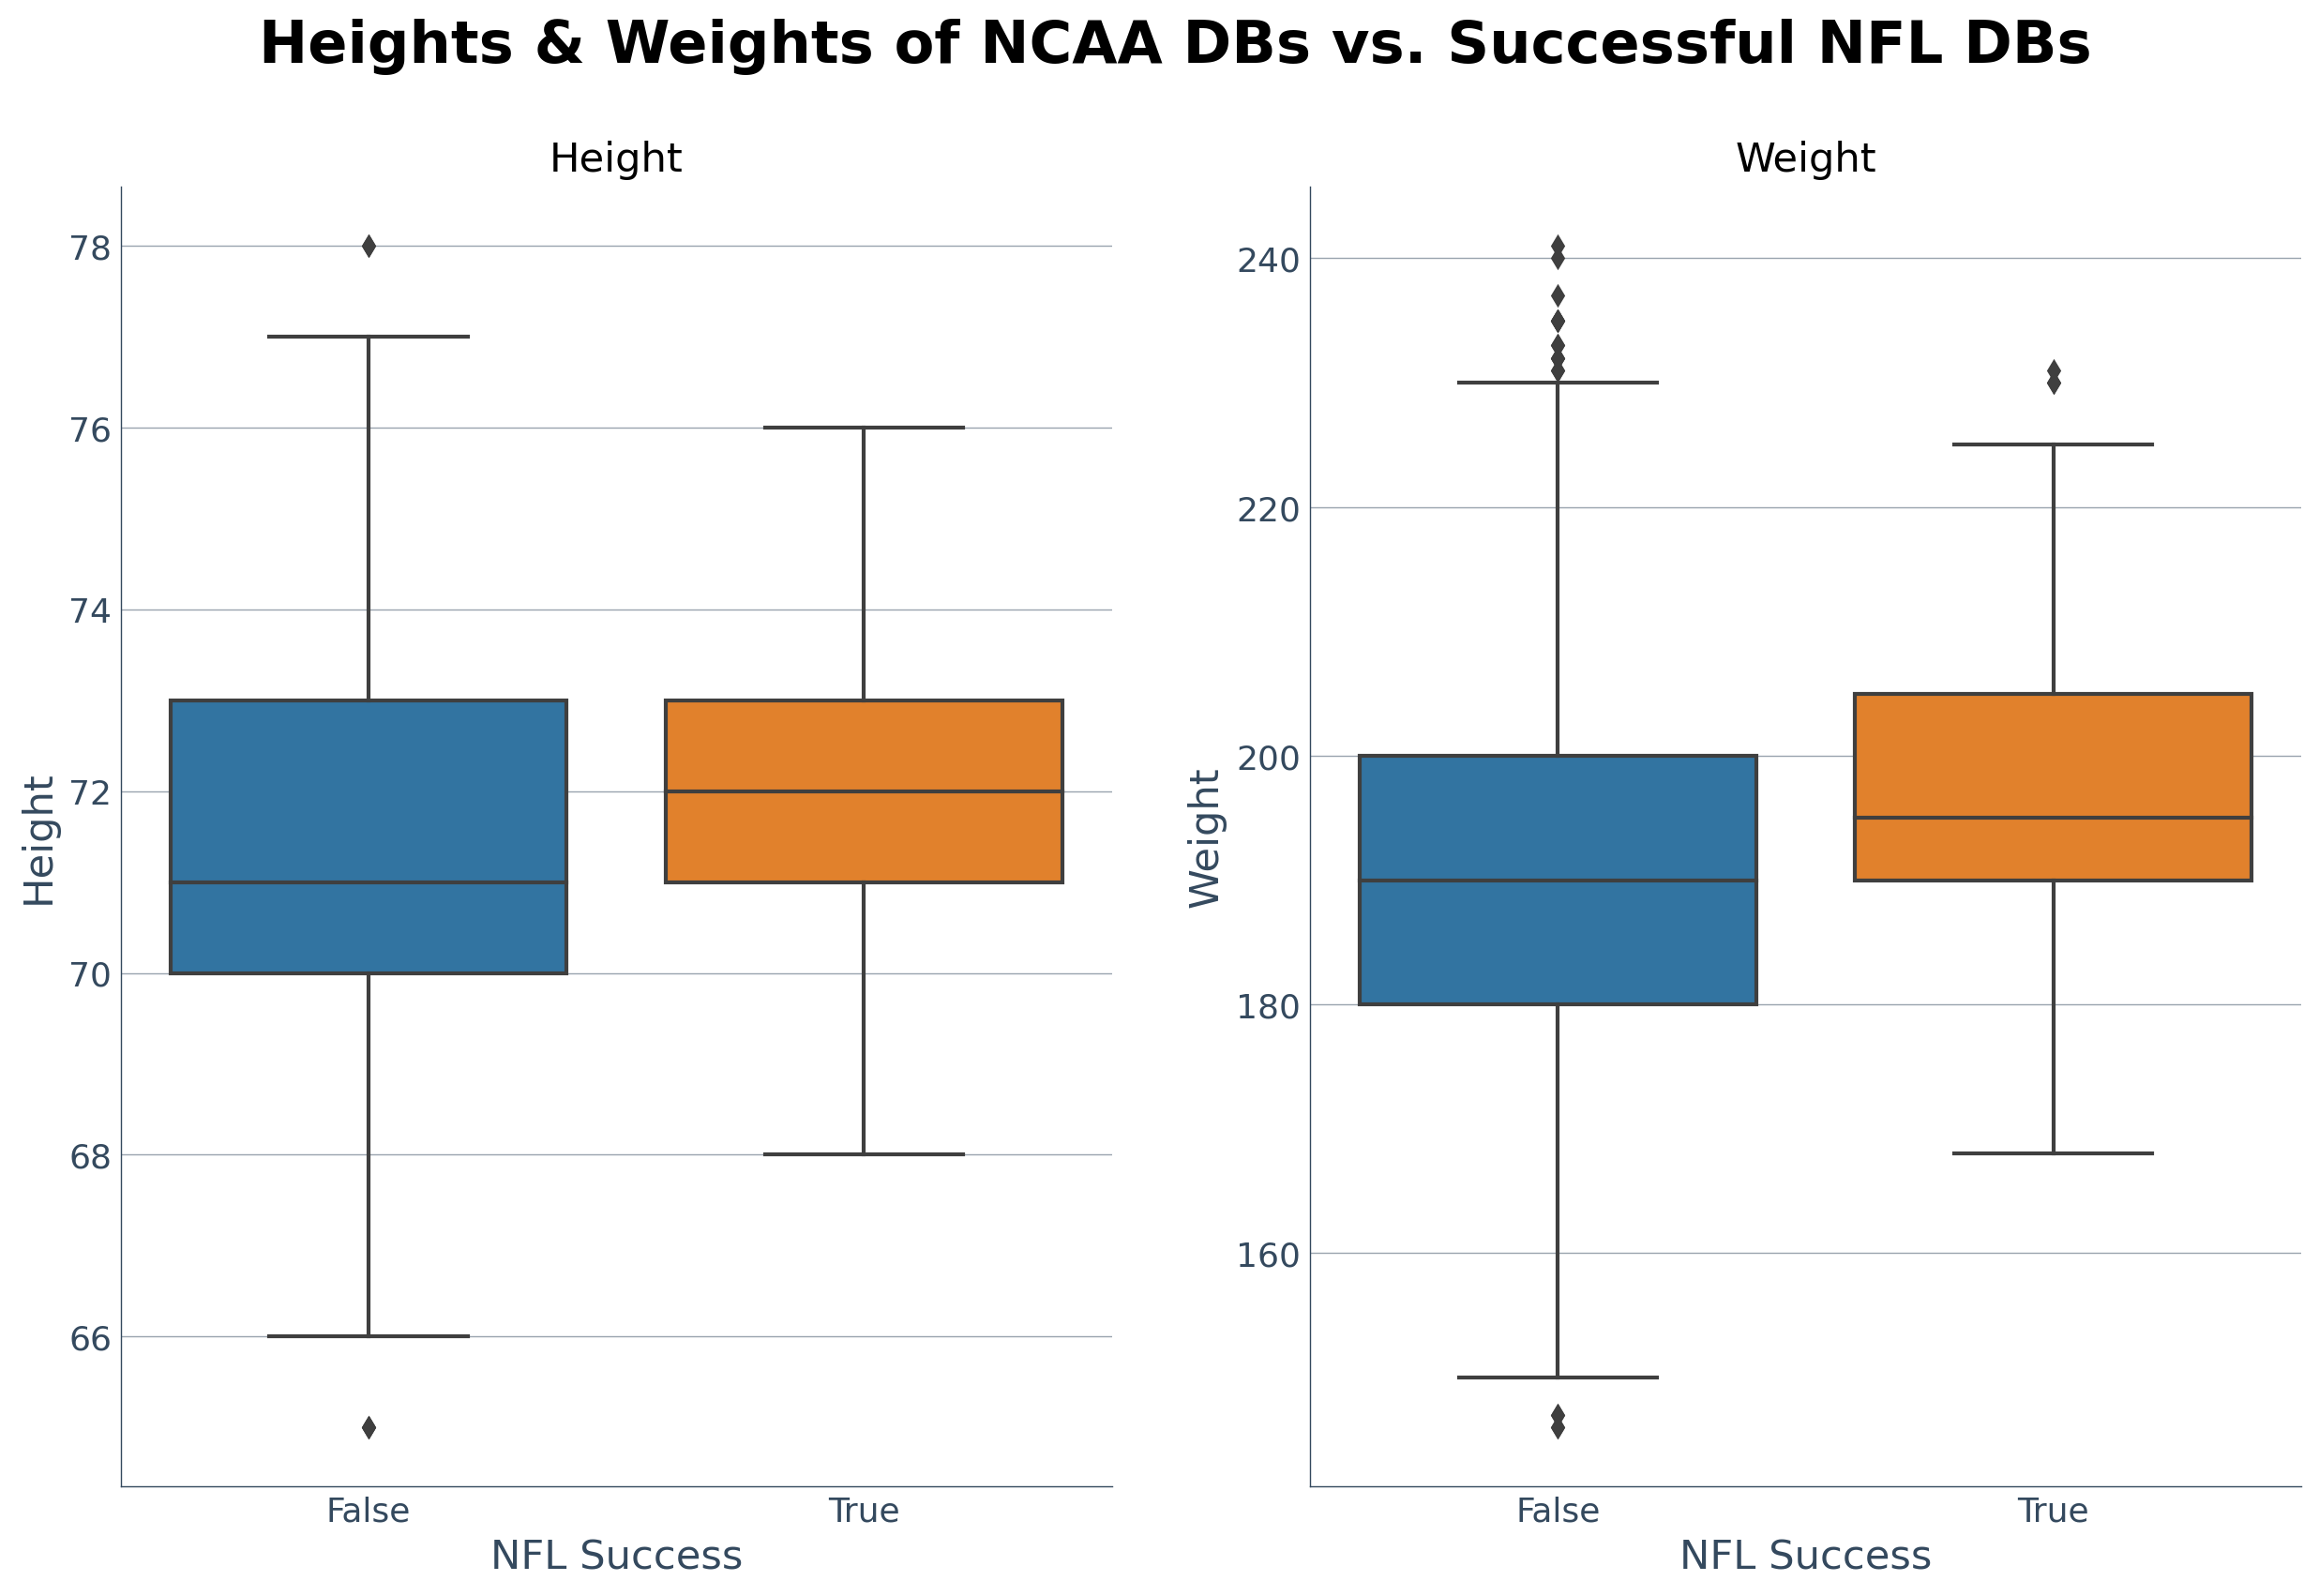

In [7]:
# draw two boxplots to compare heights and weights of all players vs. NFL successes


fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1 = sns.boxplot(x='success', y='height', data=df)
plt.xlabel('NFL Success')
plt.ylabel('Height')
plt.title('Height')

ax1 = fig.add_subplot(1, 2, 2)
ax1 = sns.boxplot(x='success', y='weight', data=df)
plt.xlabel('NFL Success')
plt.ylabel('Weight')
plt.title('Weight')

plt.suptitle('Heights & Weights of NCAA DBs vs. Successful NFL DBs');

#### Birth Month
While I don't have enough data to include birthdate in the final DataFrame for modeling, I did collect birthdates for players in the NFL.  So, I thought I'd look to see if I could validate the theory Malcolm Gladwell argues in his book, _Outliers_.  In short, I can't.  There is no apparent pattern to this data.  That doesn't invalidate his theory, either, since, as discussed above, I don't know the cutoff dates for each individual school district where these players went to elementary school or whether any of the players were more mature than their peers as a result of being held back a year.  All I can say is that I cannot provide any support to that theory based on the data presented below.

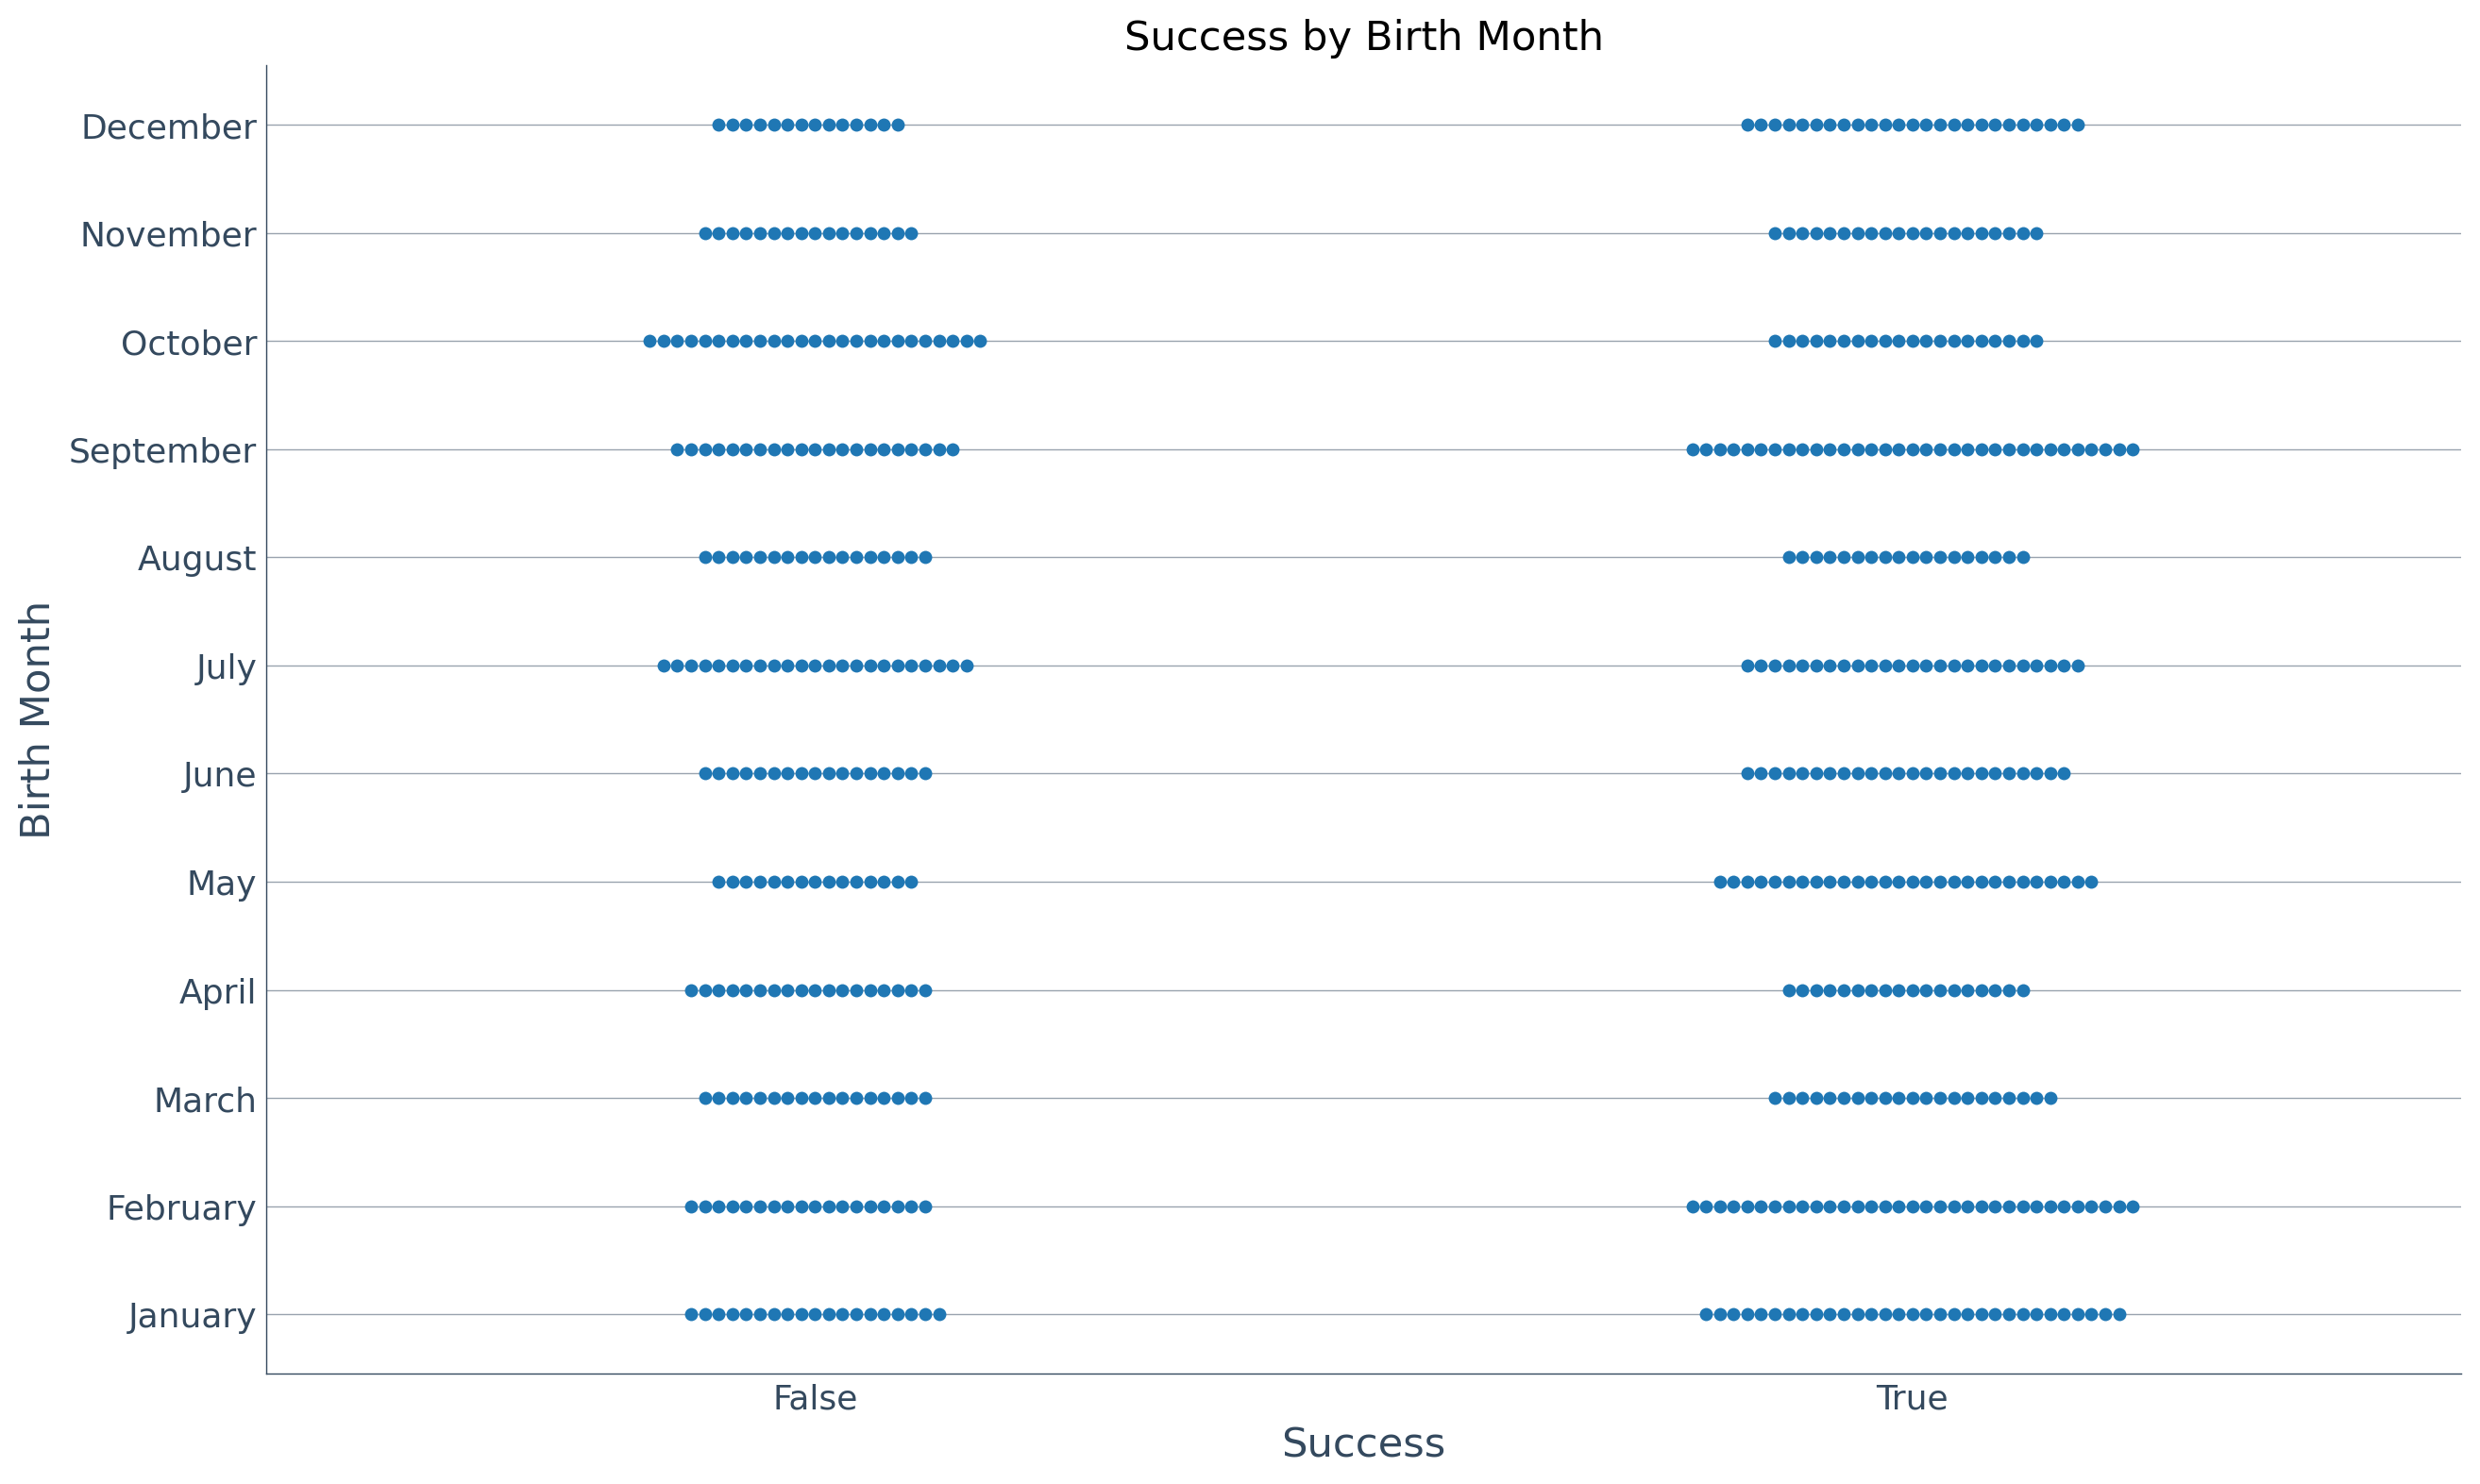

In [8]:
# plot a swarm plot to test theory from Gladwell's Outliers book

import calendar

sns.swarmplot(x='success', y='birth_month', data=df)

plt.xlabel('Success')
plt.ylabel('Birth Month')
plt.yticks(np.arange(1,13), calendar.month_name[1:13])
plt.title('Success by Birth Month');

#### Home State

Home state does appear to be a significant factor.  I believe that can be attributed to a combination of the following three factors:
1.  __football culture__: the state culture places an importance on football, causing a greater percentage of kids to try football and encouraging them to stick with it
2.  __climate__: the state's climate allows for organized youth football 9-12 months each year, giving players much more playing time prior to college
3.  __population size__: the three states that produce the overwhelming majority of NCAA players are Texas, Florida and California, all of which are populous states.  More populous states have better odds of producing more talented football players.

The bar chart showing the home states of NFL Successes is again and unsurprisingly dominated by California, Texas and Florida.

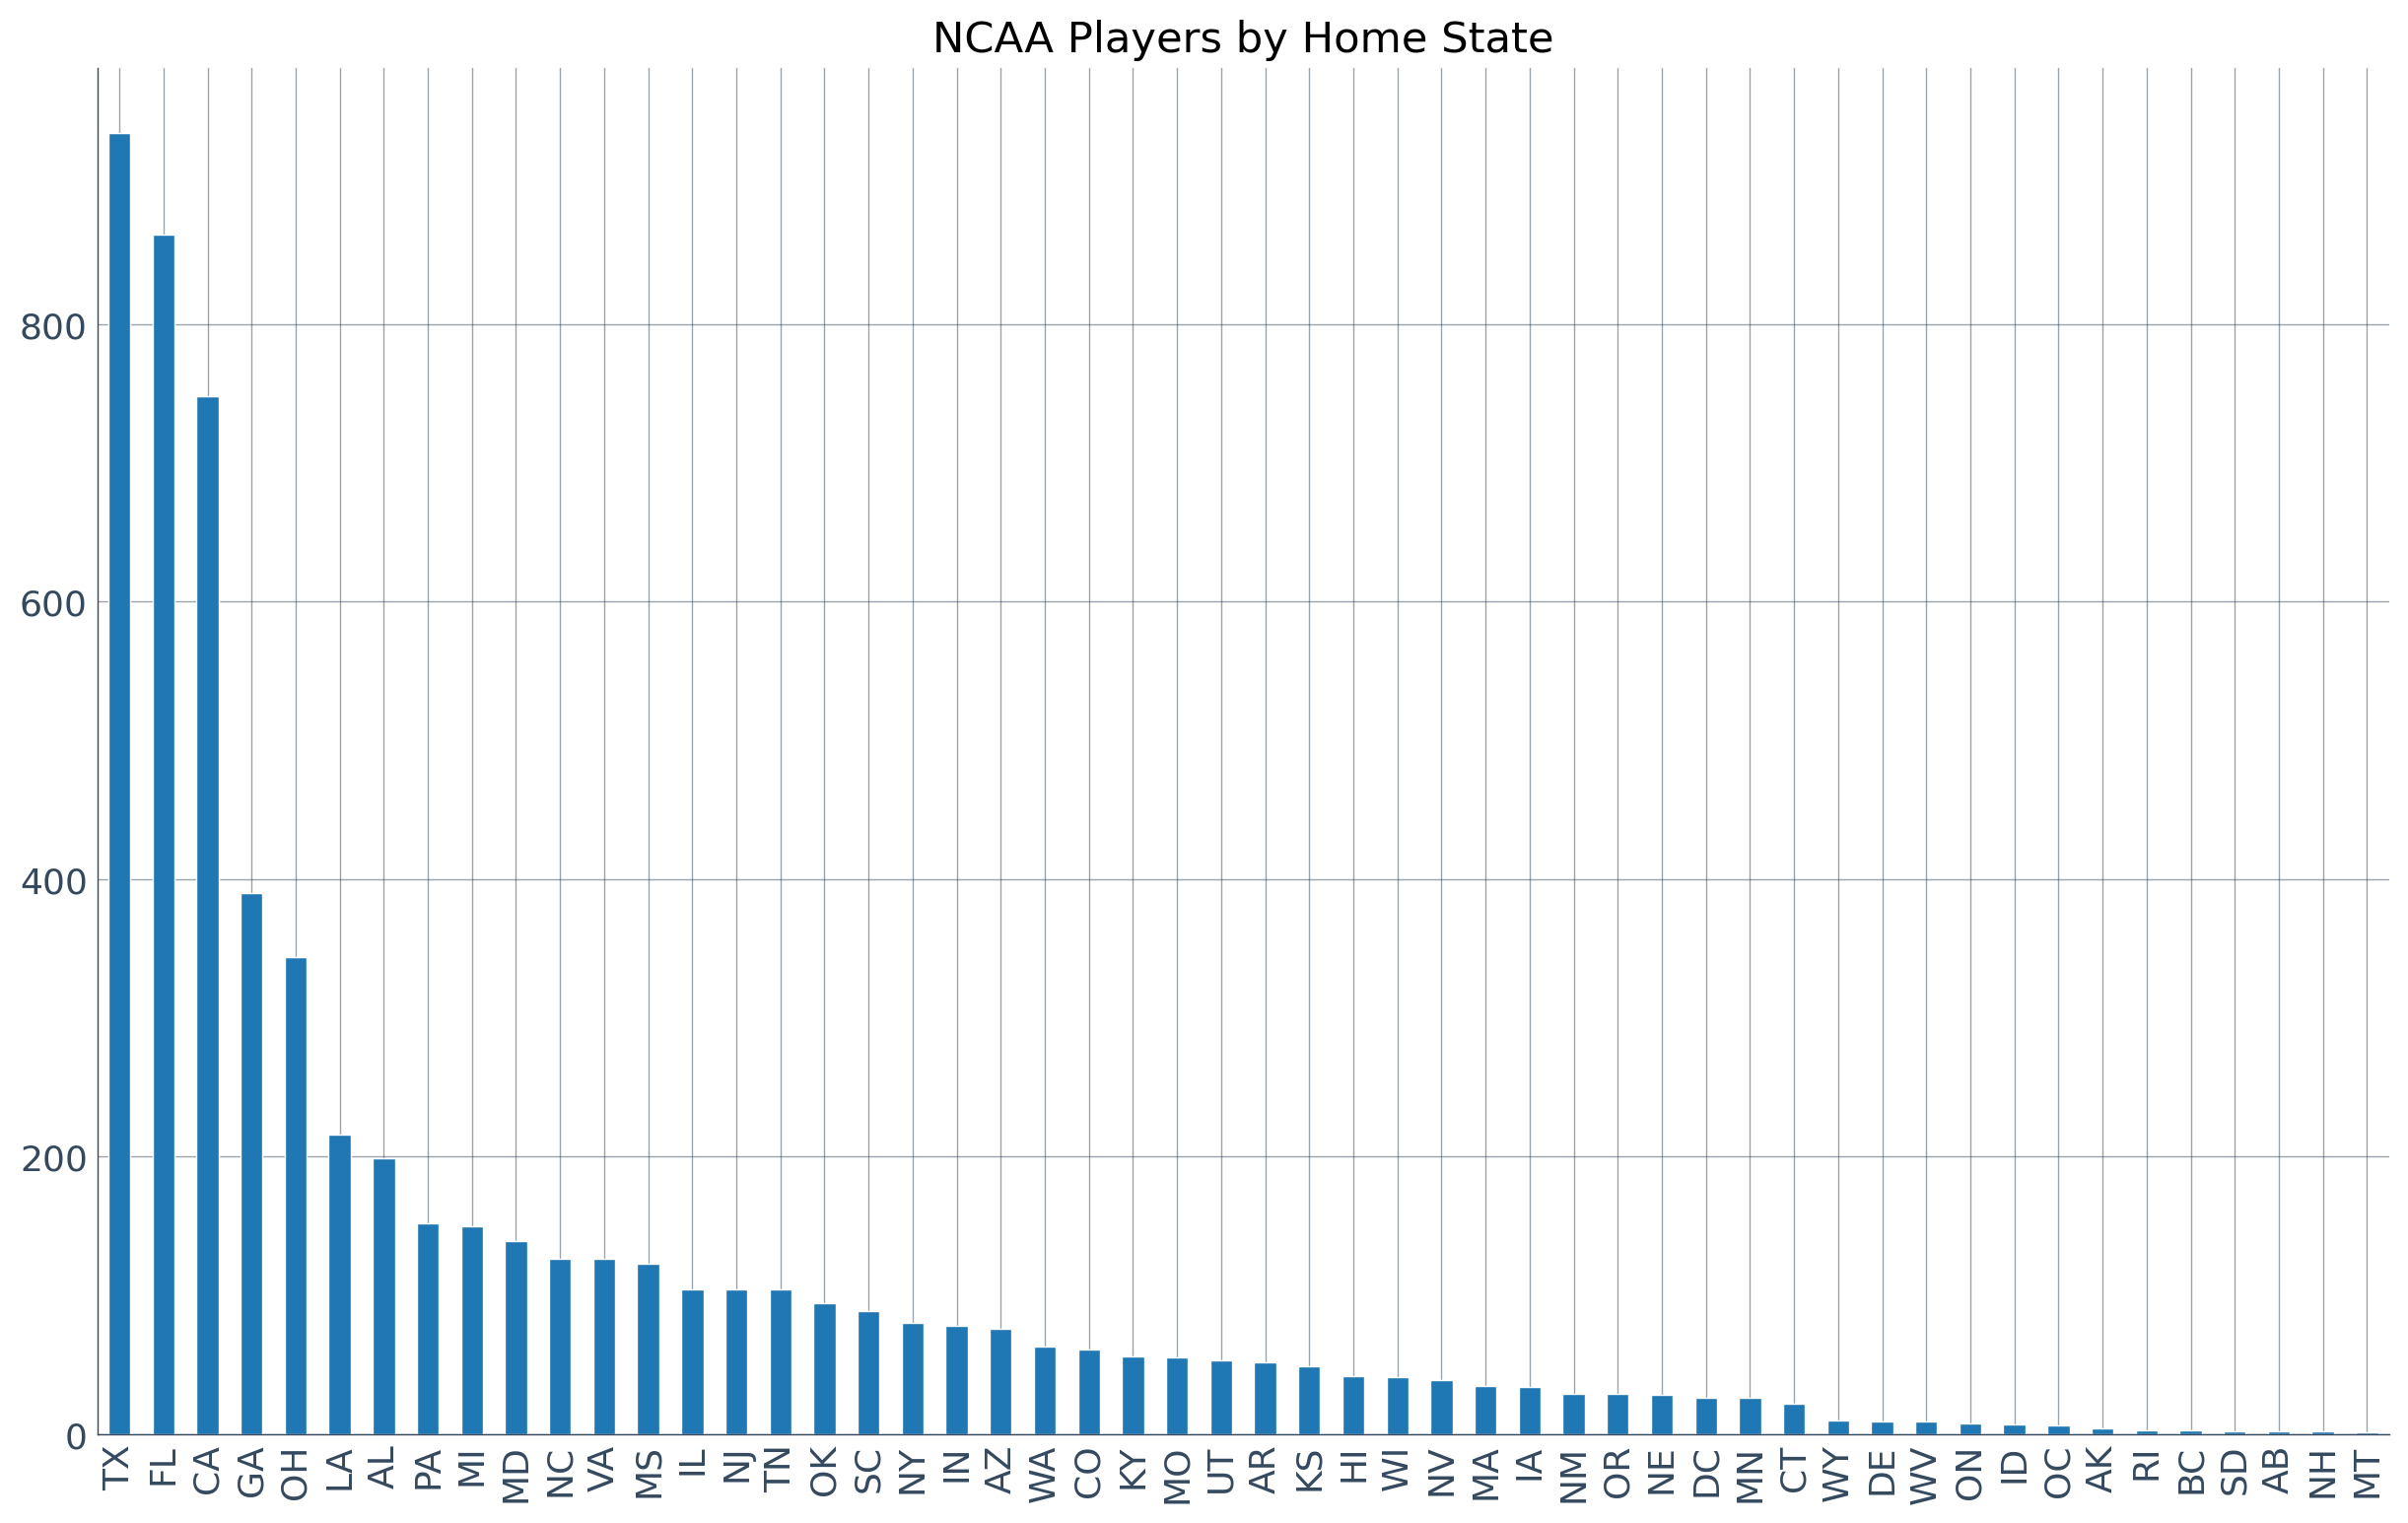

In [9]:
# plot a bar chart showing the distribution of players by home_state
df.home_state.value_counts().plot(kind = 'bar')
plt.title('NCAA Players by Home State');

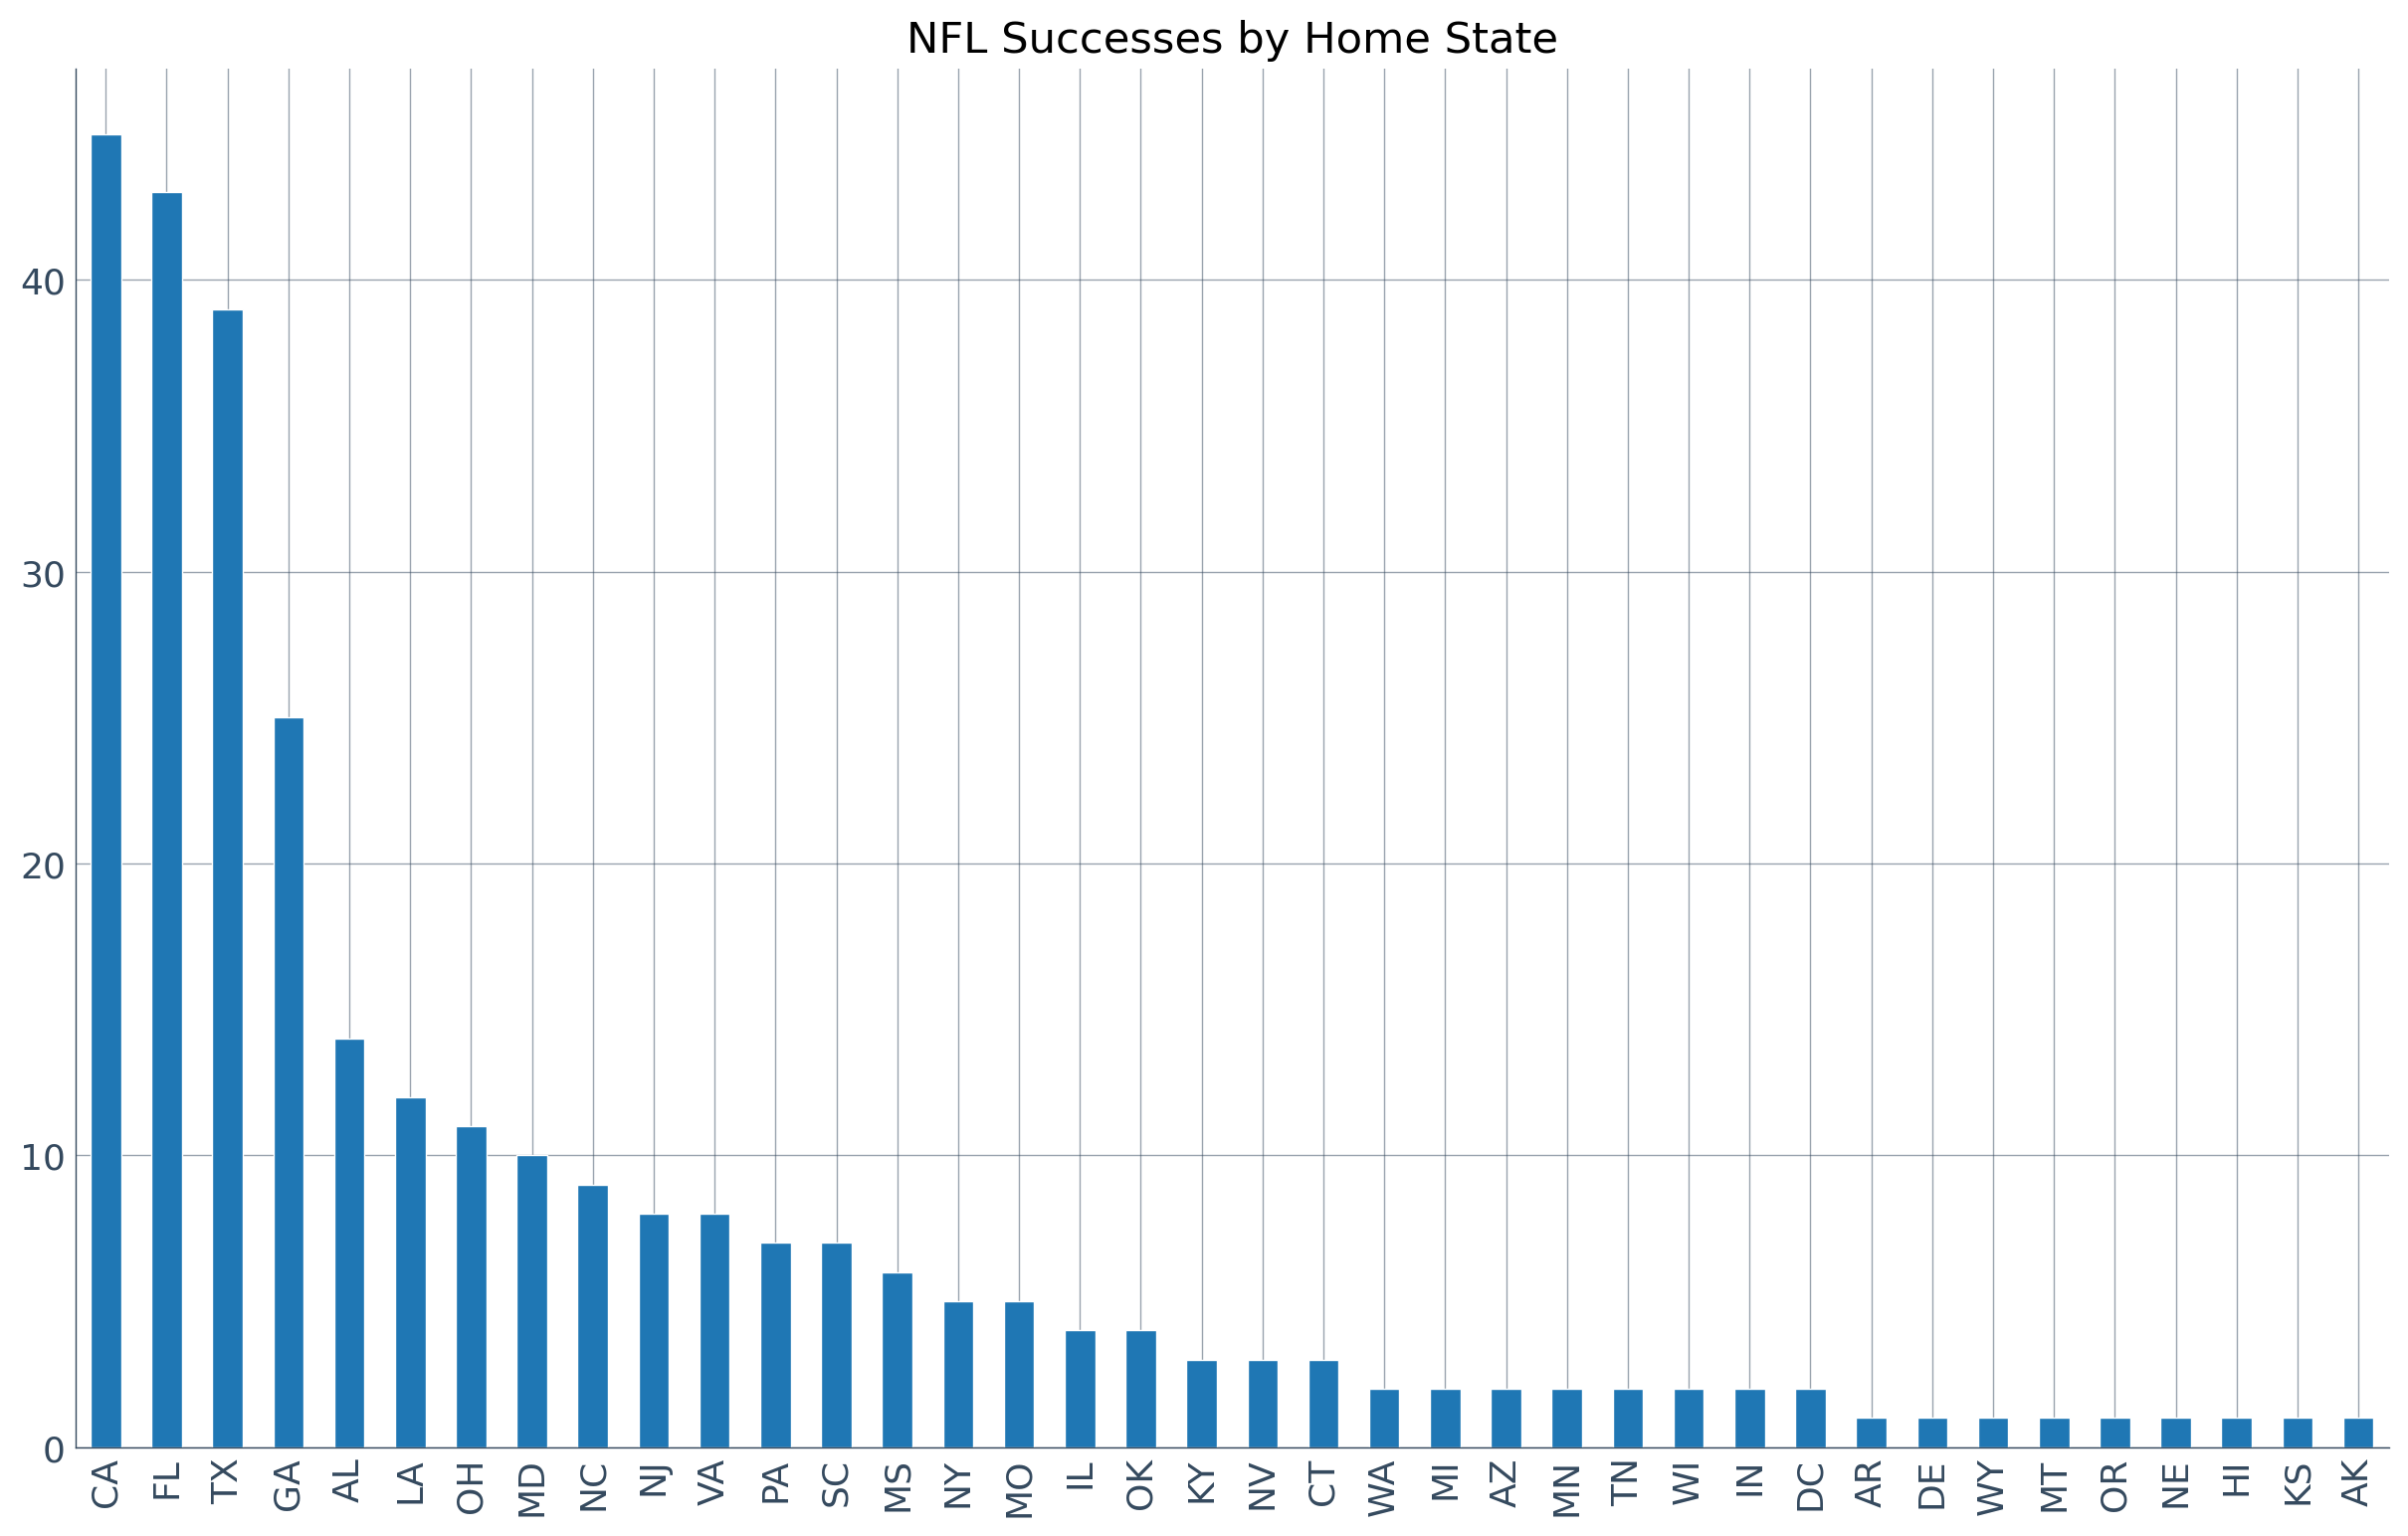

In [10]:
# draw a bar chart showing the home states of NFL successes
successes.home_state.value_counts().plot(kind = 'bar');
plt.title('NFL Successes by Home State');

In [11]:
# Crosstab containing precise number of NCAA players and NFL successes from each state
# also included are Canadian provinces: 'AB' = Alberta, 'BC' = British Columbia, ON' = Ontario
# and, 'OC' = 'Other Country'
pd.crosstab(df.home_state, df.success).sort_values(by = False, ascending=False)

success,False,True
home_state,,
TX,899,39
FL,822,43
CA,703,45
GA,365,25
OH,333,11
LA,204,12
AL,185,14
MI,148,2
PA,145,7


#### NCAA Teams

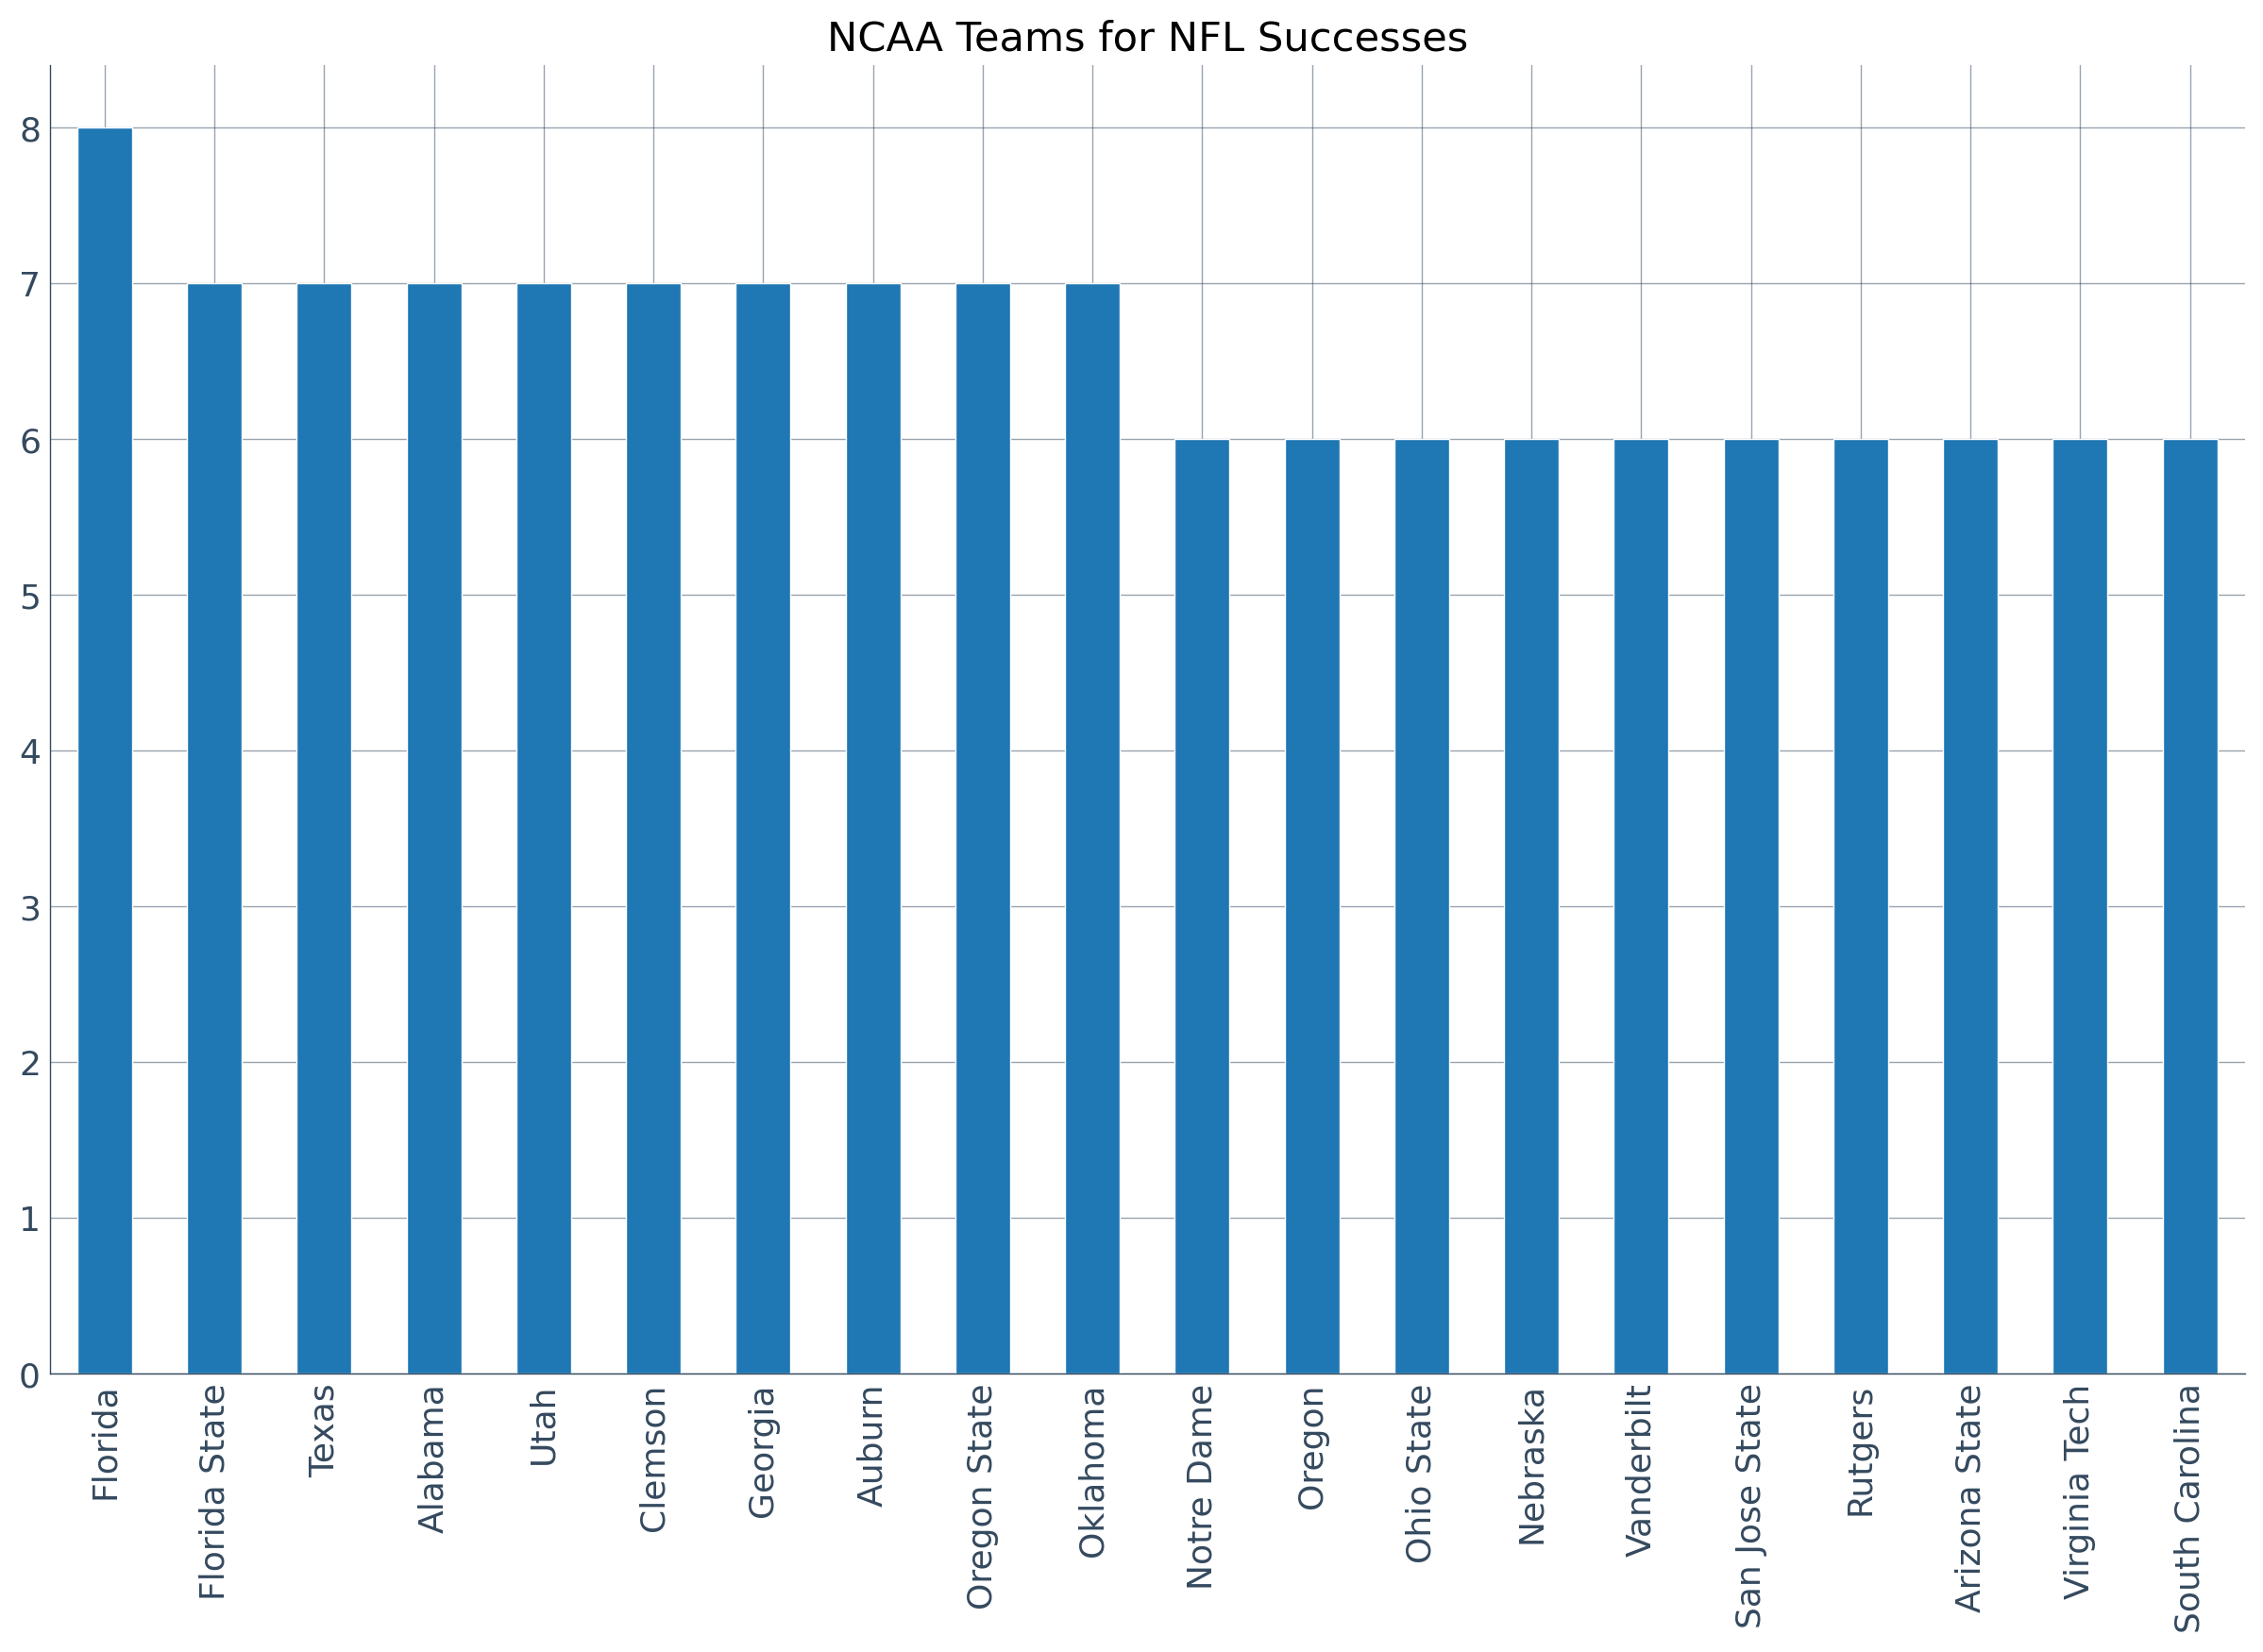

In [12]:
# draw a bar chart showing the distribution of colleges attended by NFL successes
successes.team.value_counts().head(20).plot(kind = 'bar')

plt.title('NCAA Teams for NFL Successes');

#### NCAA Experience
Players who became successful in the NFL typically played 35-55 games over the course of four or five years in the NCAA.  It is not surprising that successes tended to play both more total years and more games per year than other players.

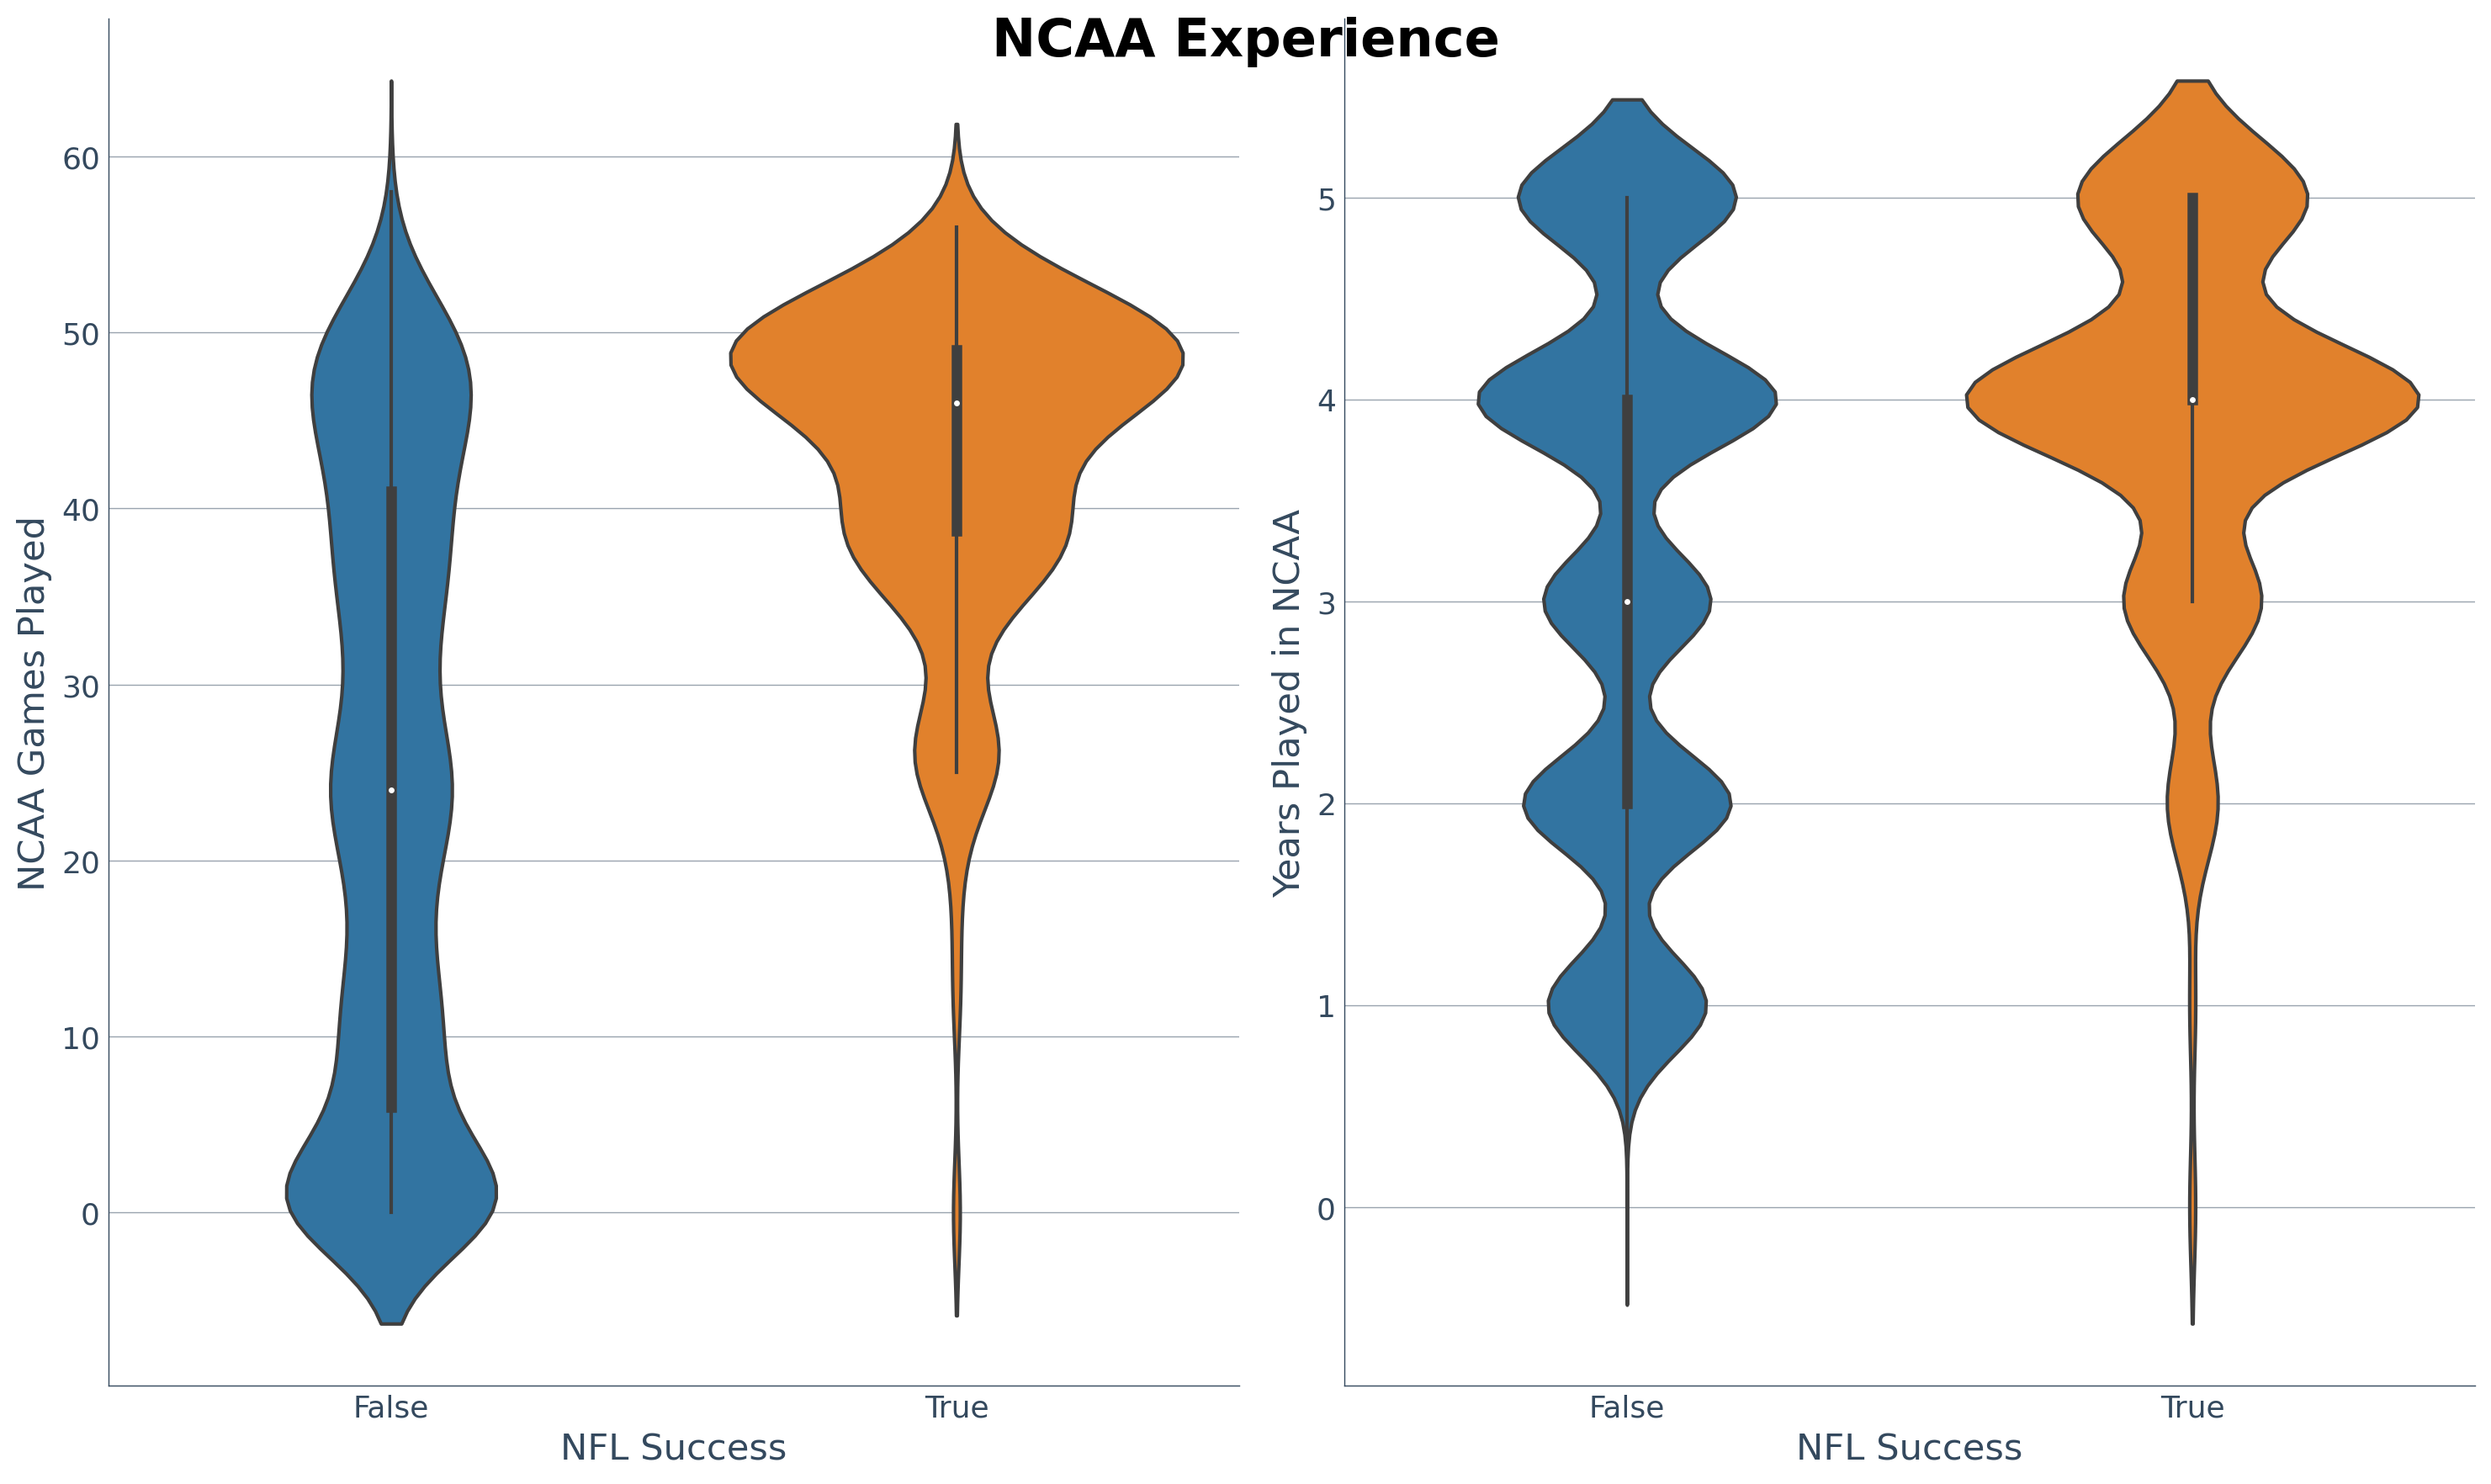

In [13]:
# plot NCAA games played
plt.subplot(1,2,1)
sns.violinplot(x='success', y='games', data=df)
plt.xlabel('NFL Success')
plt.ylabel('NCAA Games Played')

# plot NCAA years played
plt.subplot(1,2,2)
sns.violinplot(x='success', y='ncaa_yr_ct', data=df)
plt.xlabel('NFL Success')
plt.ylabel('Years Played in NCAA')

plt.tight_layout()
plt.suptitle('NCAA Experience');

#### Game Statistics
Below are violin plots for select game statistics.  In each case, players who became successful in the NFL show better statistics.  I included punt and kick return statistics because, while returning kicks and punts isn't a core skill for a defensive back, being able to contribute to a team's special teams game by returning punts and kicks increases the odds that a player on the margins will be signed by an NFL team.  Also, the physical traits needed to return punts and kicks (speed, acceleration, ability to quickly change directions, good hands and durability) are also characteristics of a successful defensive back.

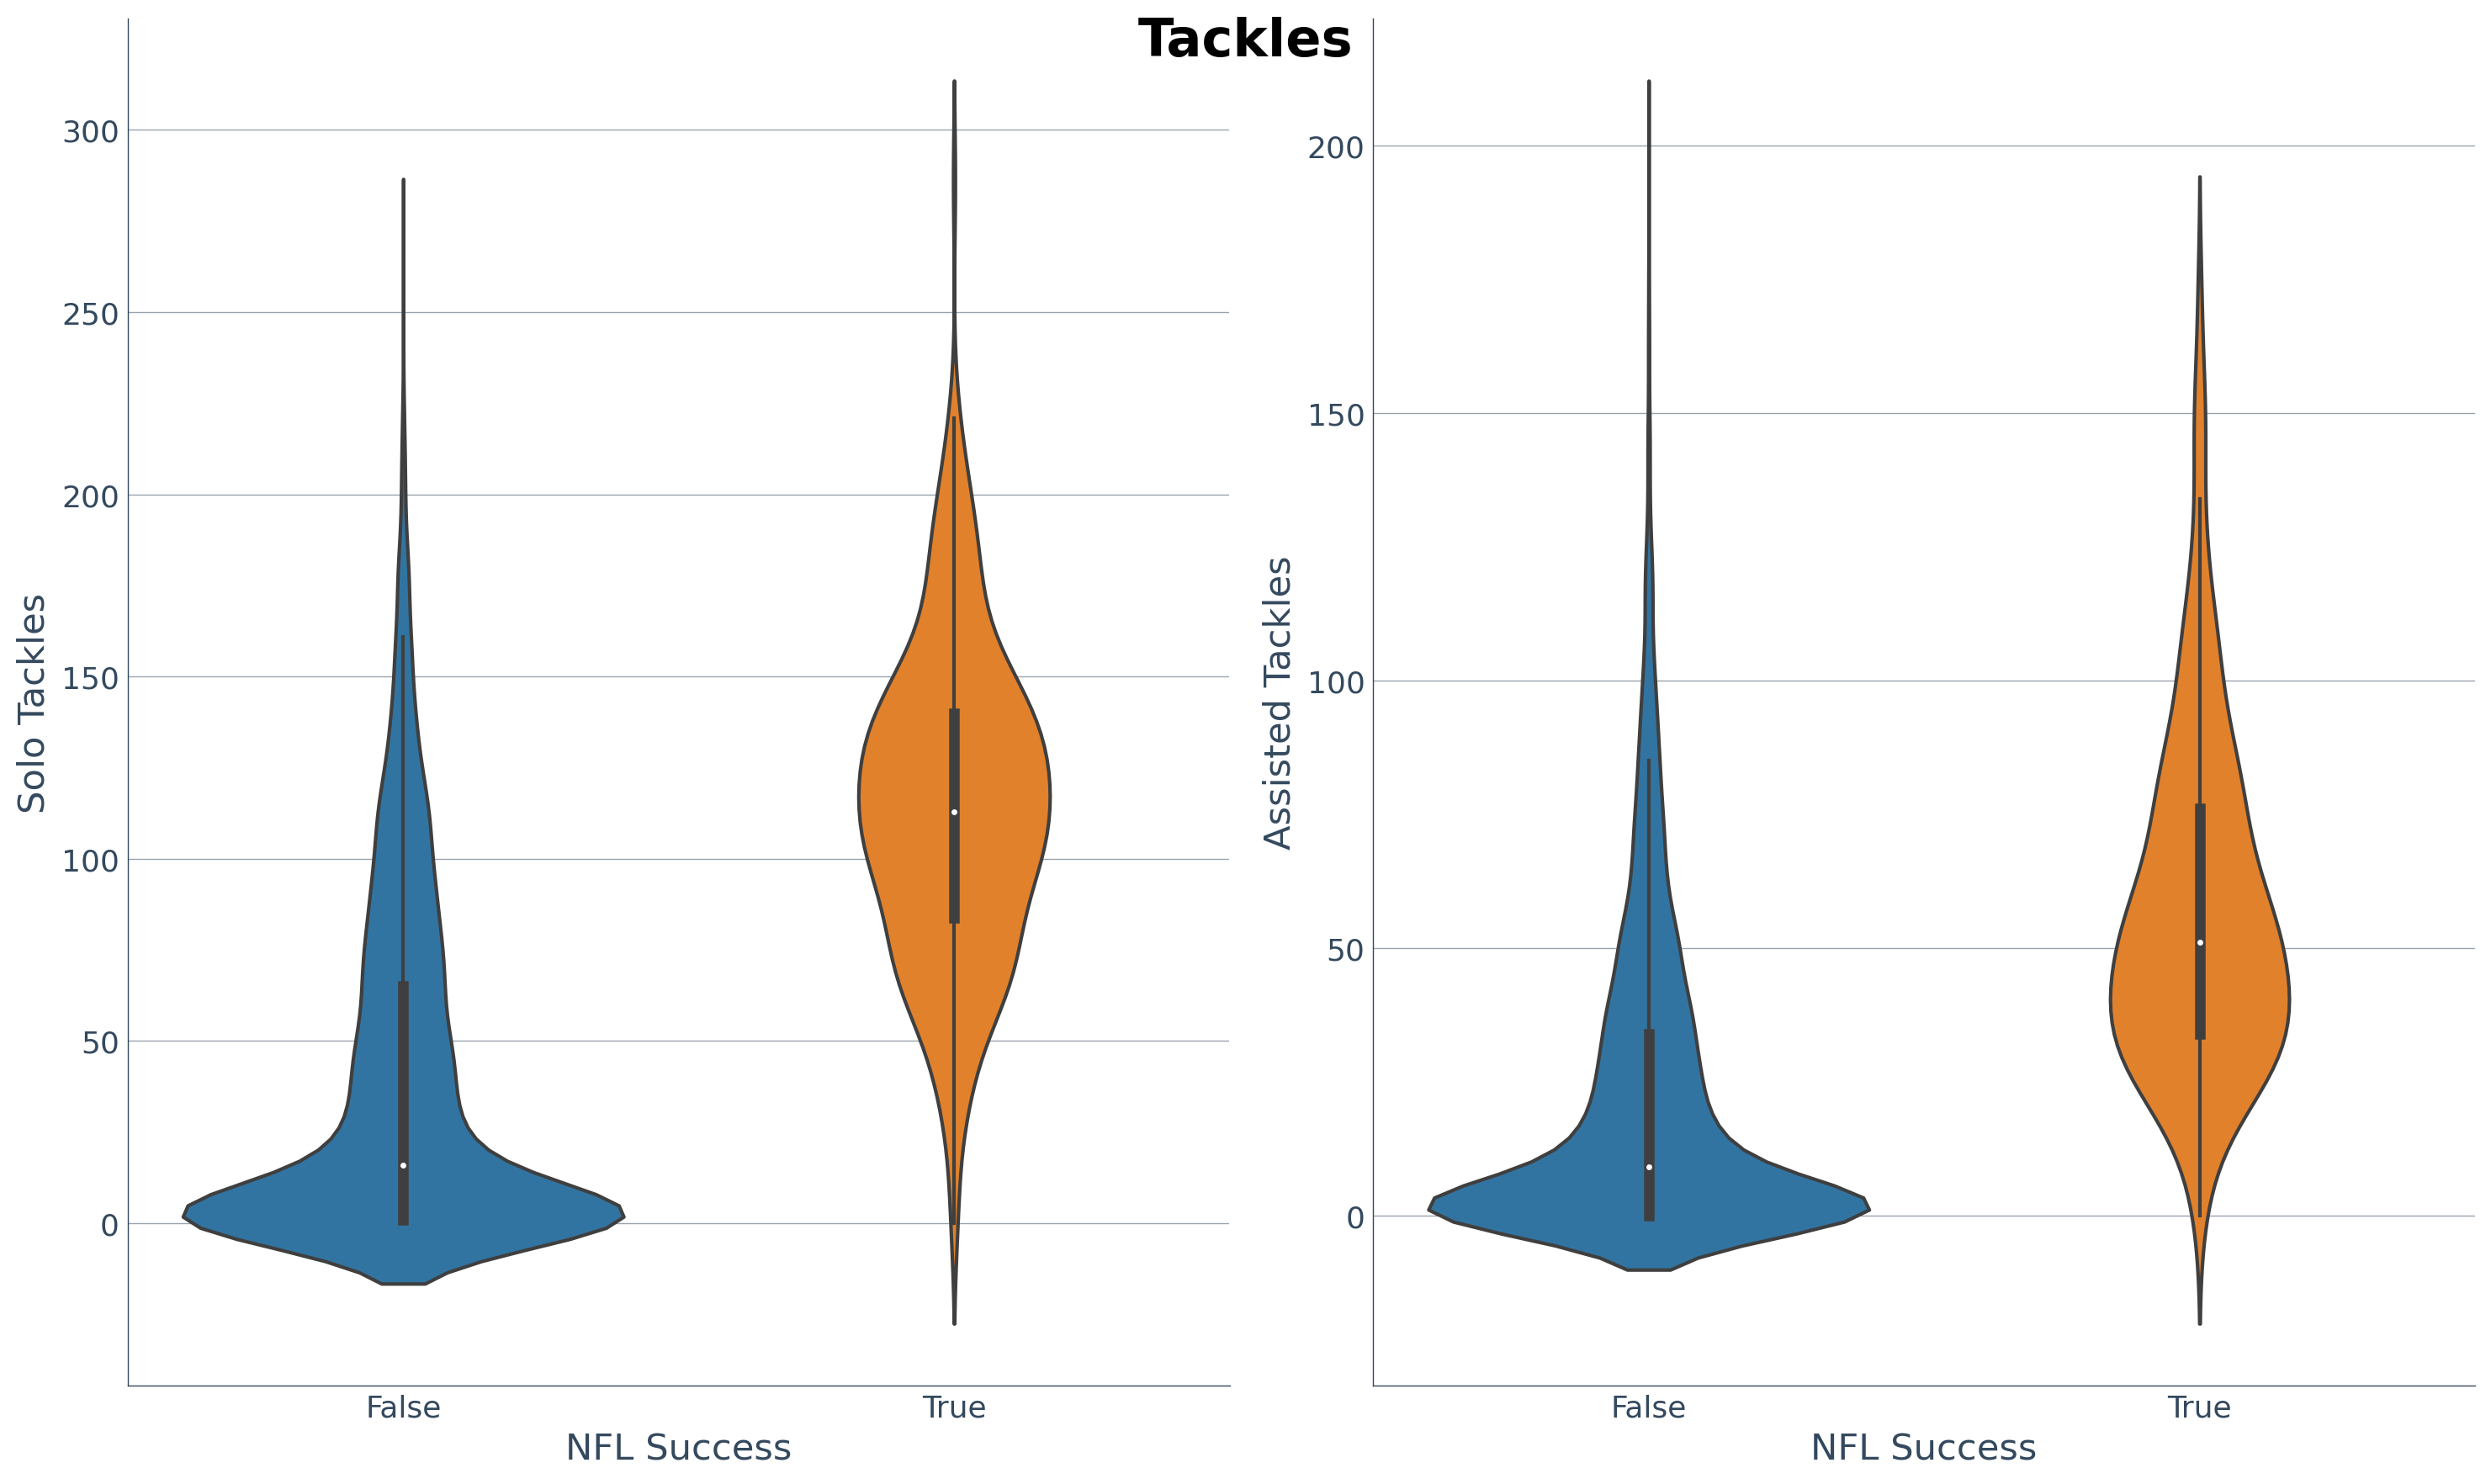

In [14]:
# plot solo tackles
plt.subplot(1,2,1)
sns.violinplot(x='success', y='tackles_solo', data=df)
plt.xlabel('NFL Success')
plt.ylabel('Solo Tackles')

# plot tackle assists
plt.subplot(1,2,2)
sns.violinplot(x='success', y='tackles_asst', data=df)
plt.xlabel('NFL Success')
plt.ylabel('Assisted Tackles')

plt.tight_layout()
plt.suptitle('Tackles');

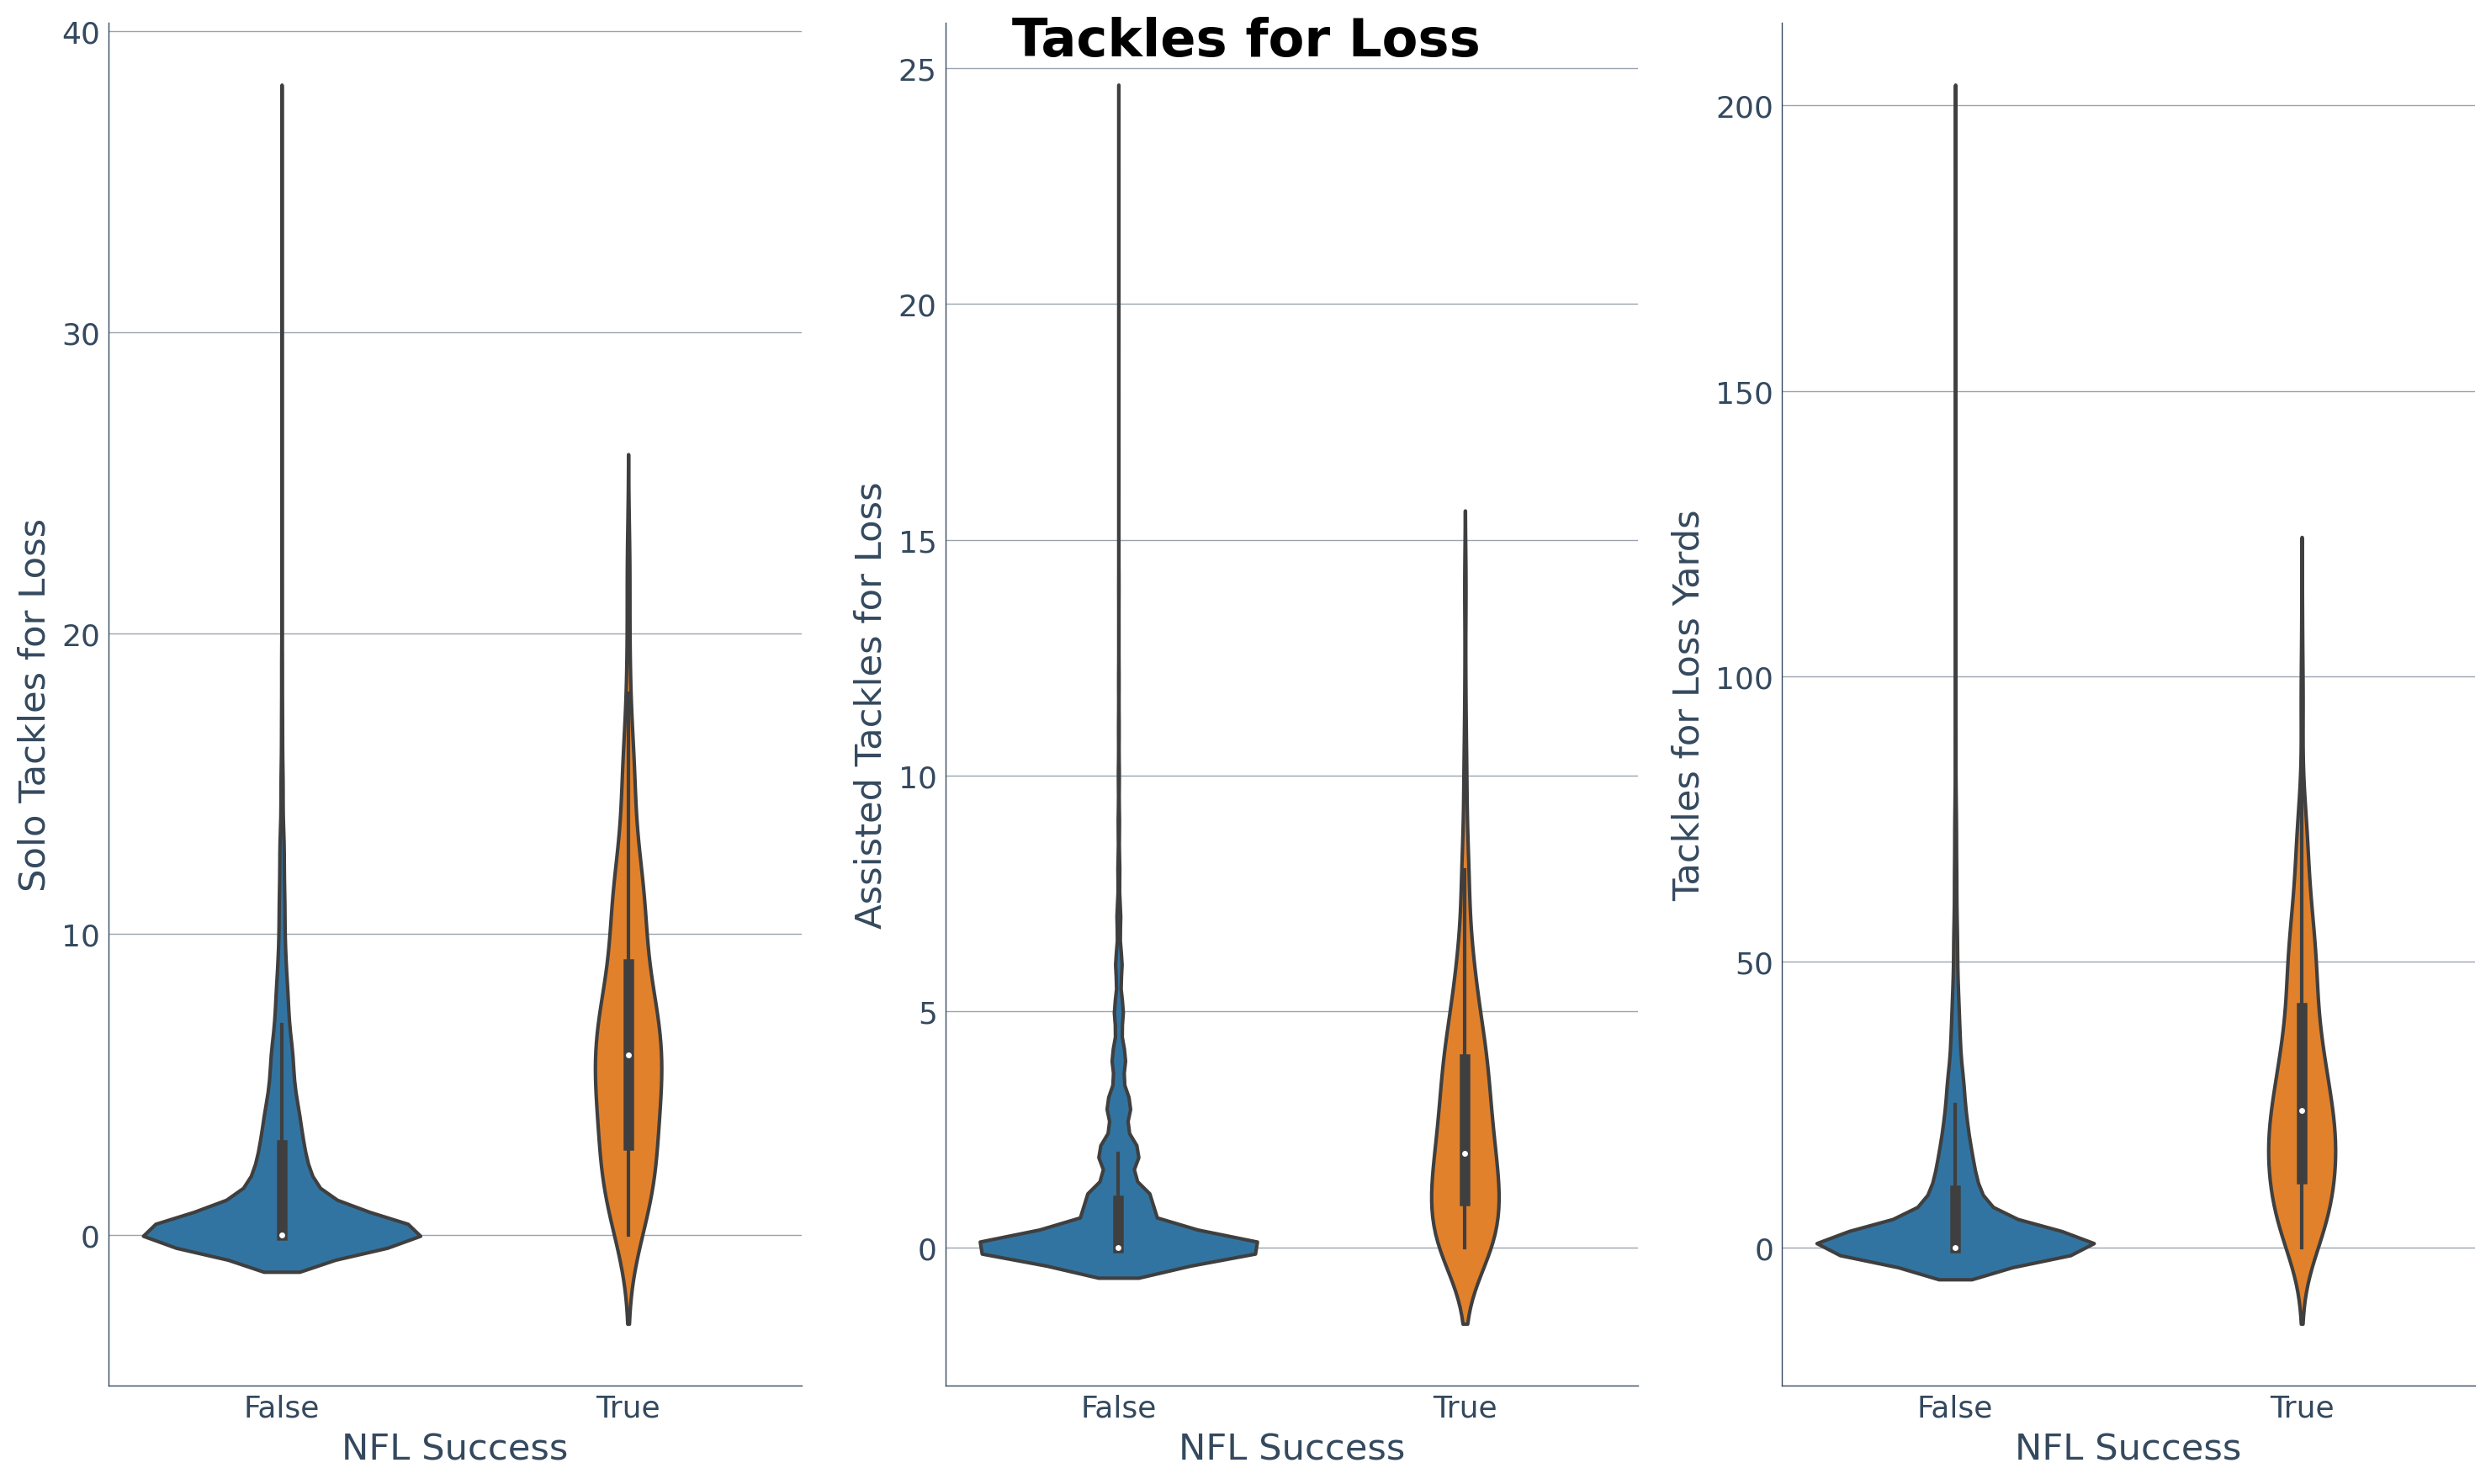

In [15]:
# plot solo tackles for loss
plt.subplot(1,3,1)
sns.violinplot(x='success', y='tfl_solo', data=df)
plt.xlabel('NFL Success')
plt.ylabel('Solo Tackles for Loss')

# plot tackle for loss assists
plt.subplot(1,3,2)
sns.violinplot(x='success', y='tfl_asst', data=df)
plt.xlabel('NFL Success')
plt.ylabel('Assisted Tackles for Loss')

# plot tackle for loss yards
plt.subplot(1,3,3)
sns.violinplot(x='success', y='tfl_yards', data=df)
plt.xlabel('NFL Success')
plt.ylabel('Tackles for Loss Yards')

plt.tight_layout()
plt.suptitle('Tackles for Loss');

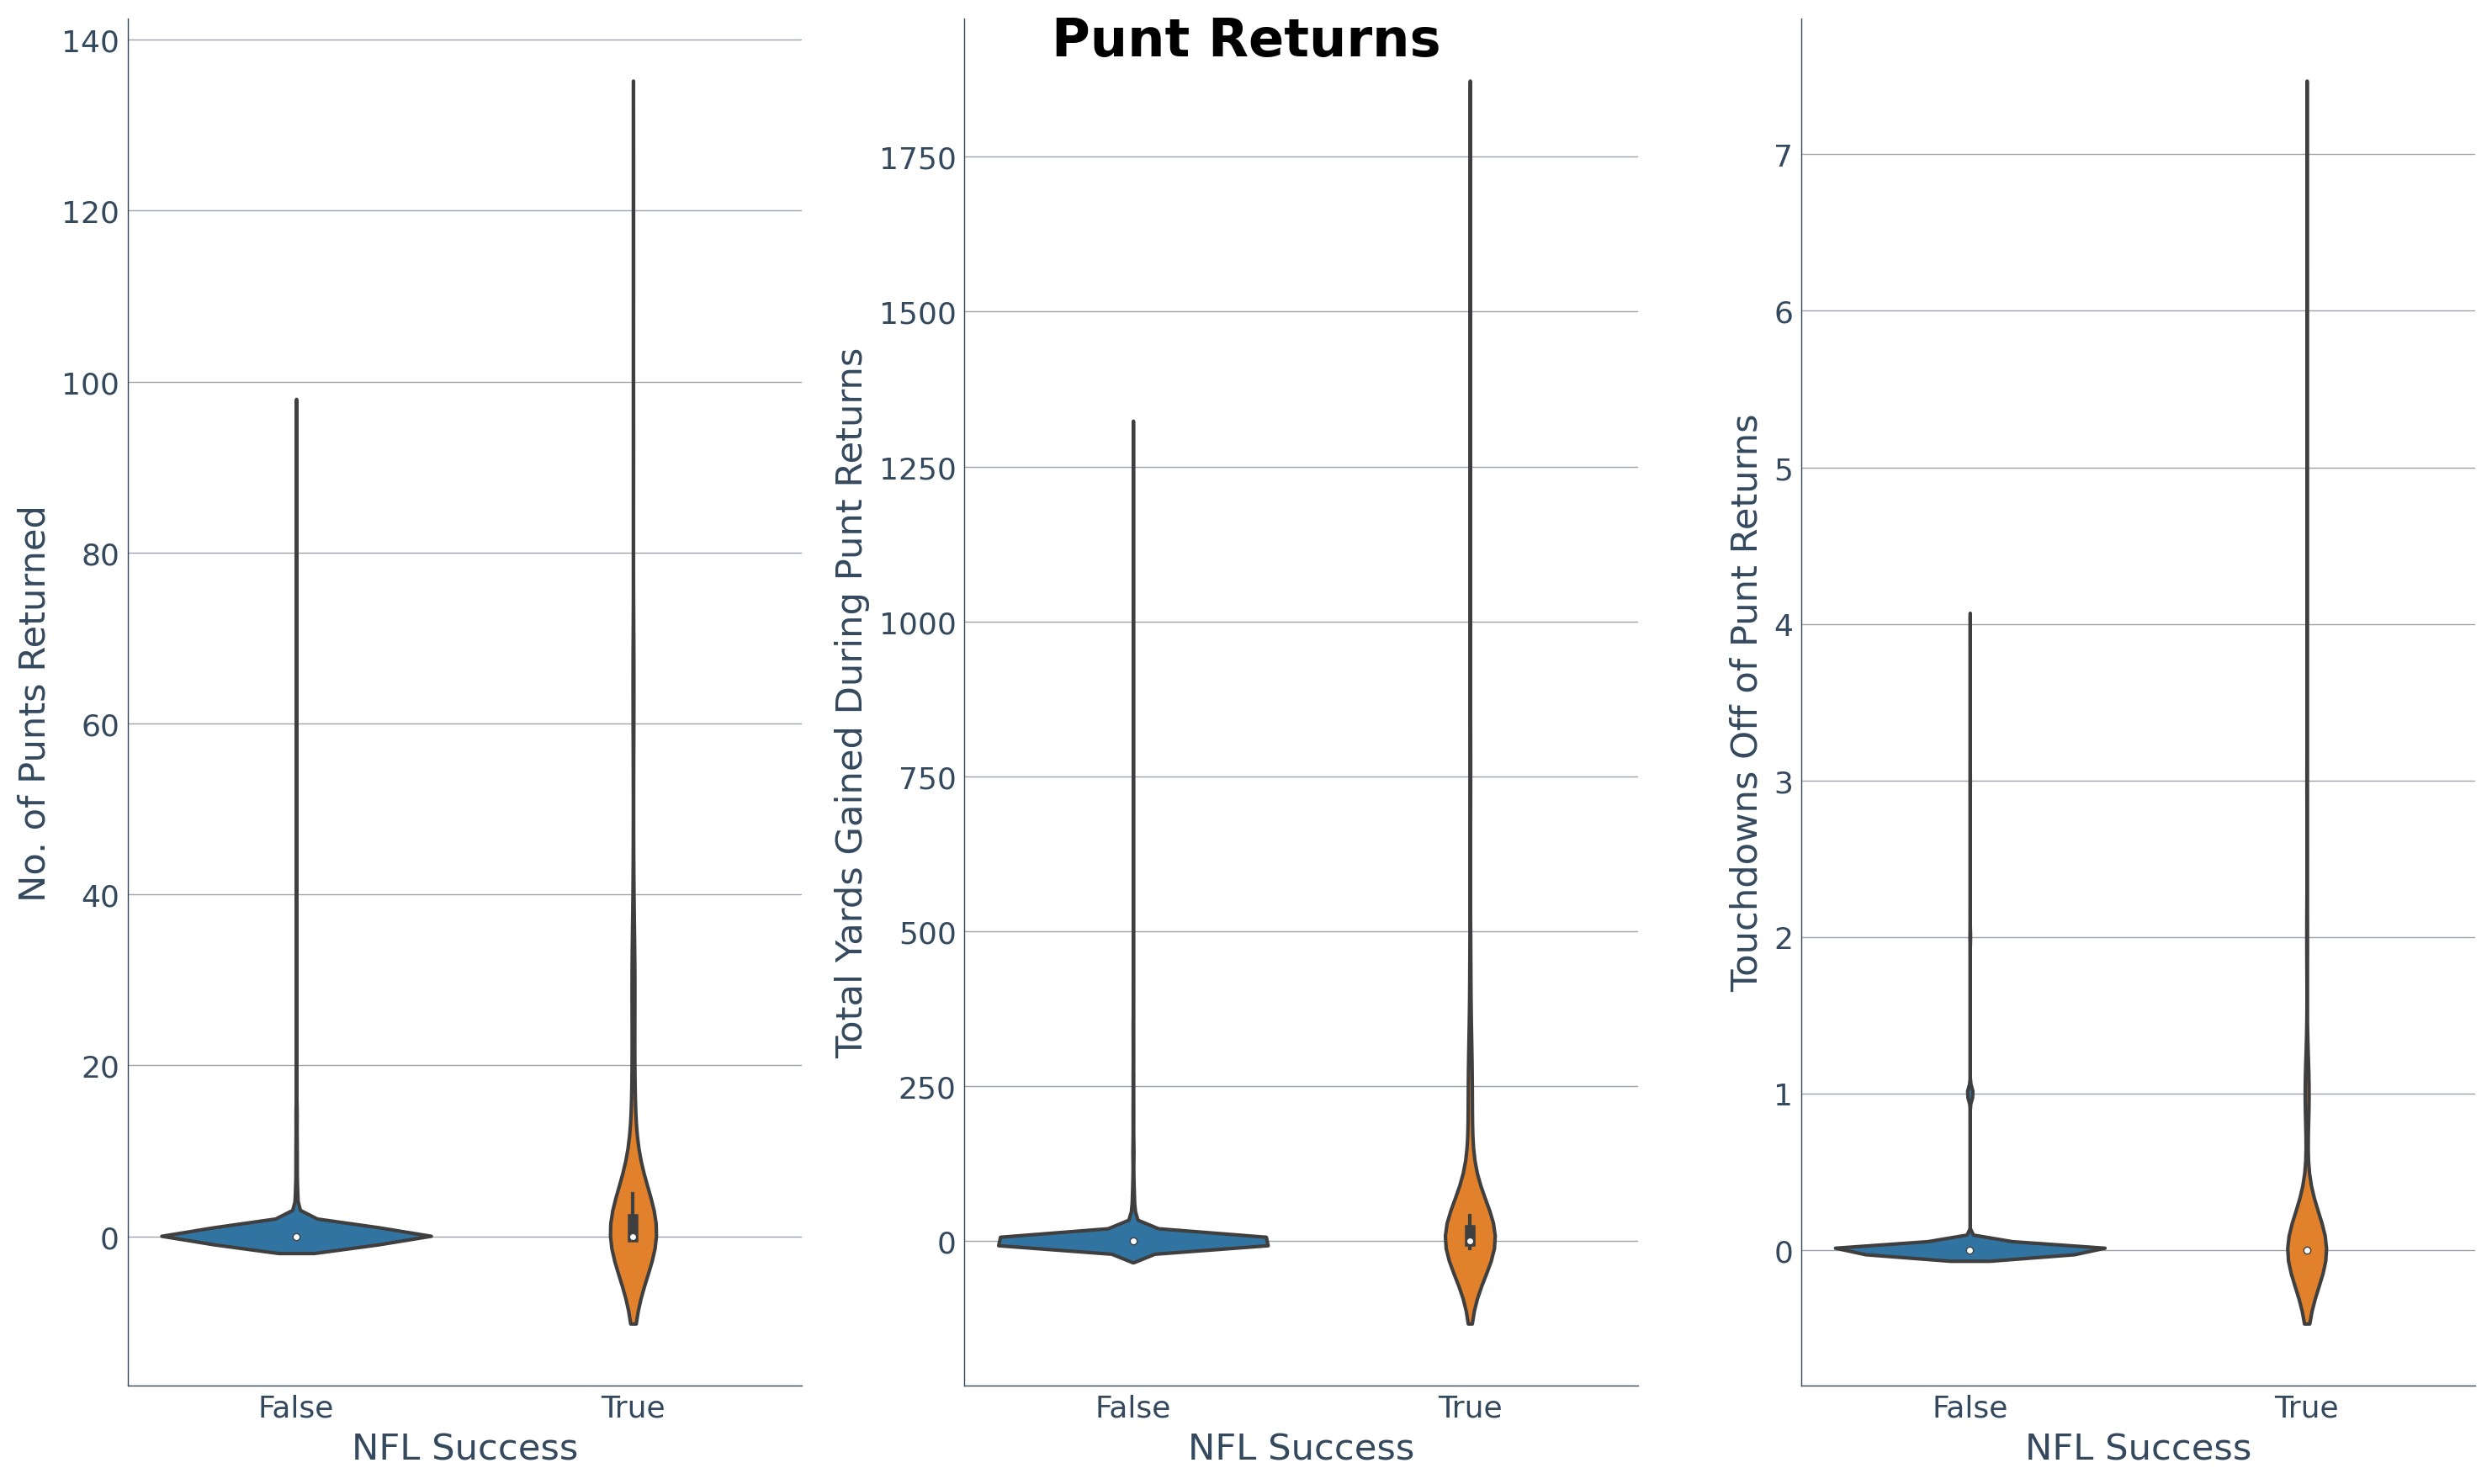

In [16]:
# plot punts returned
plt.subplot(1,3,1)
sns.violinplot(x='success', y='punt_ret', data=df)
plt.xlabel('NFL Success')
plt.ylabel('No. of Punts Returned')

# plot yards returned on punts
plt.subplot(1,3,2)
sns.violinplot(x='success', y='punt_ret_yards', data=df)
plt.xlabel('NFL Success')
plt.ylabel('Total Yards Gained During Punt Returns')

# plot TDs off of punt returns
plt.subplot(1,3,3)
sns.violinplot(x='success', y='punt_ret_td', data=df)
plt.xlabel('NFL Success')
plt.ylabel('Touchdowns Off of Punt Returns')

plt.tight_layout()
plt.suptitle('Punt Returns');

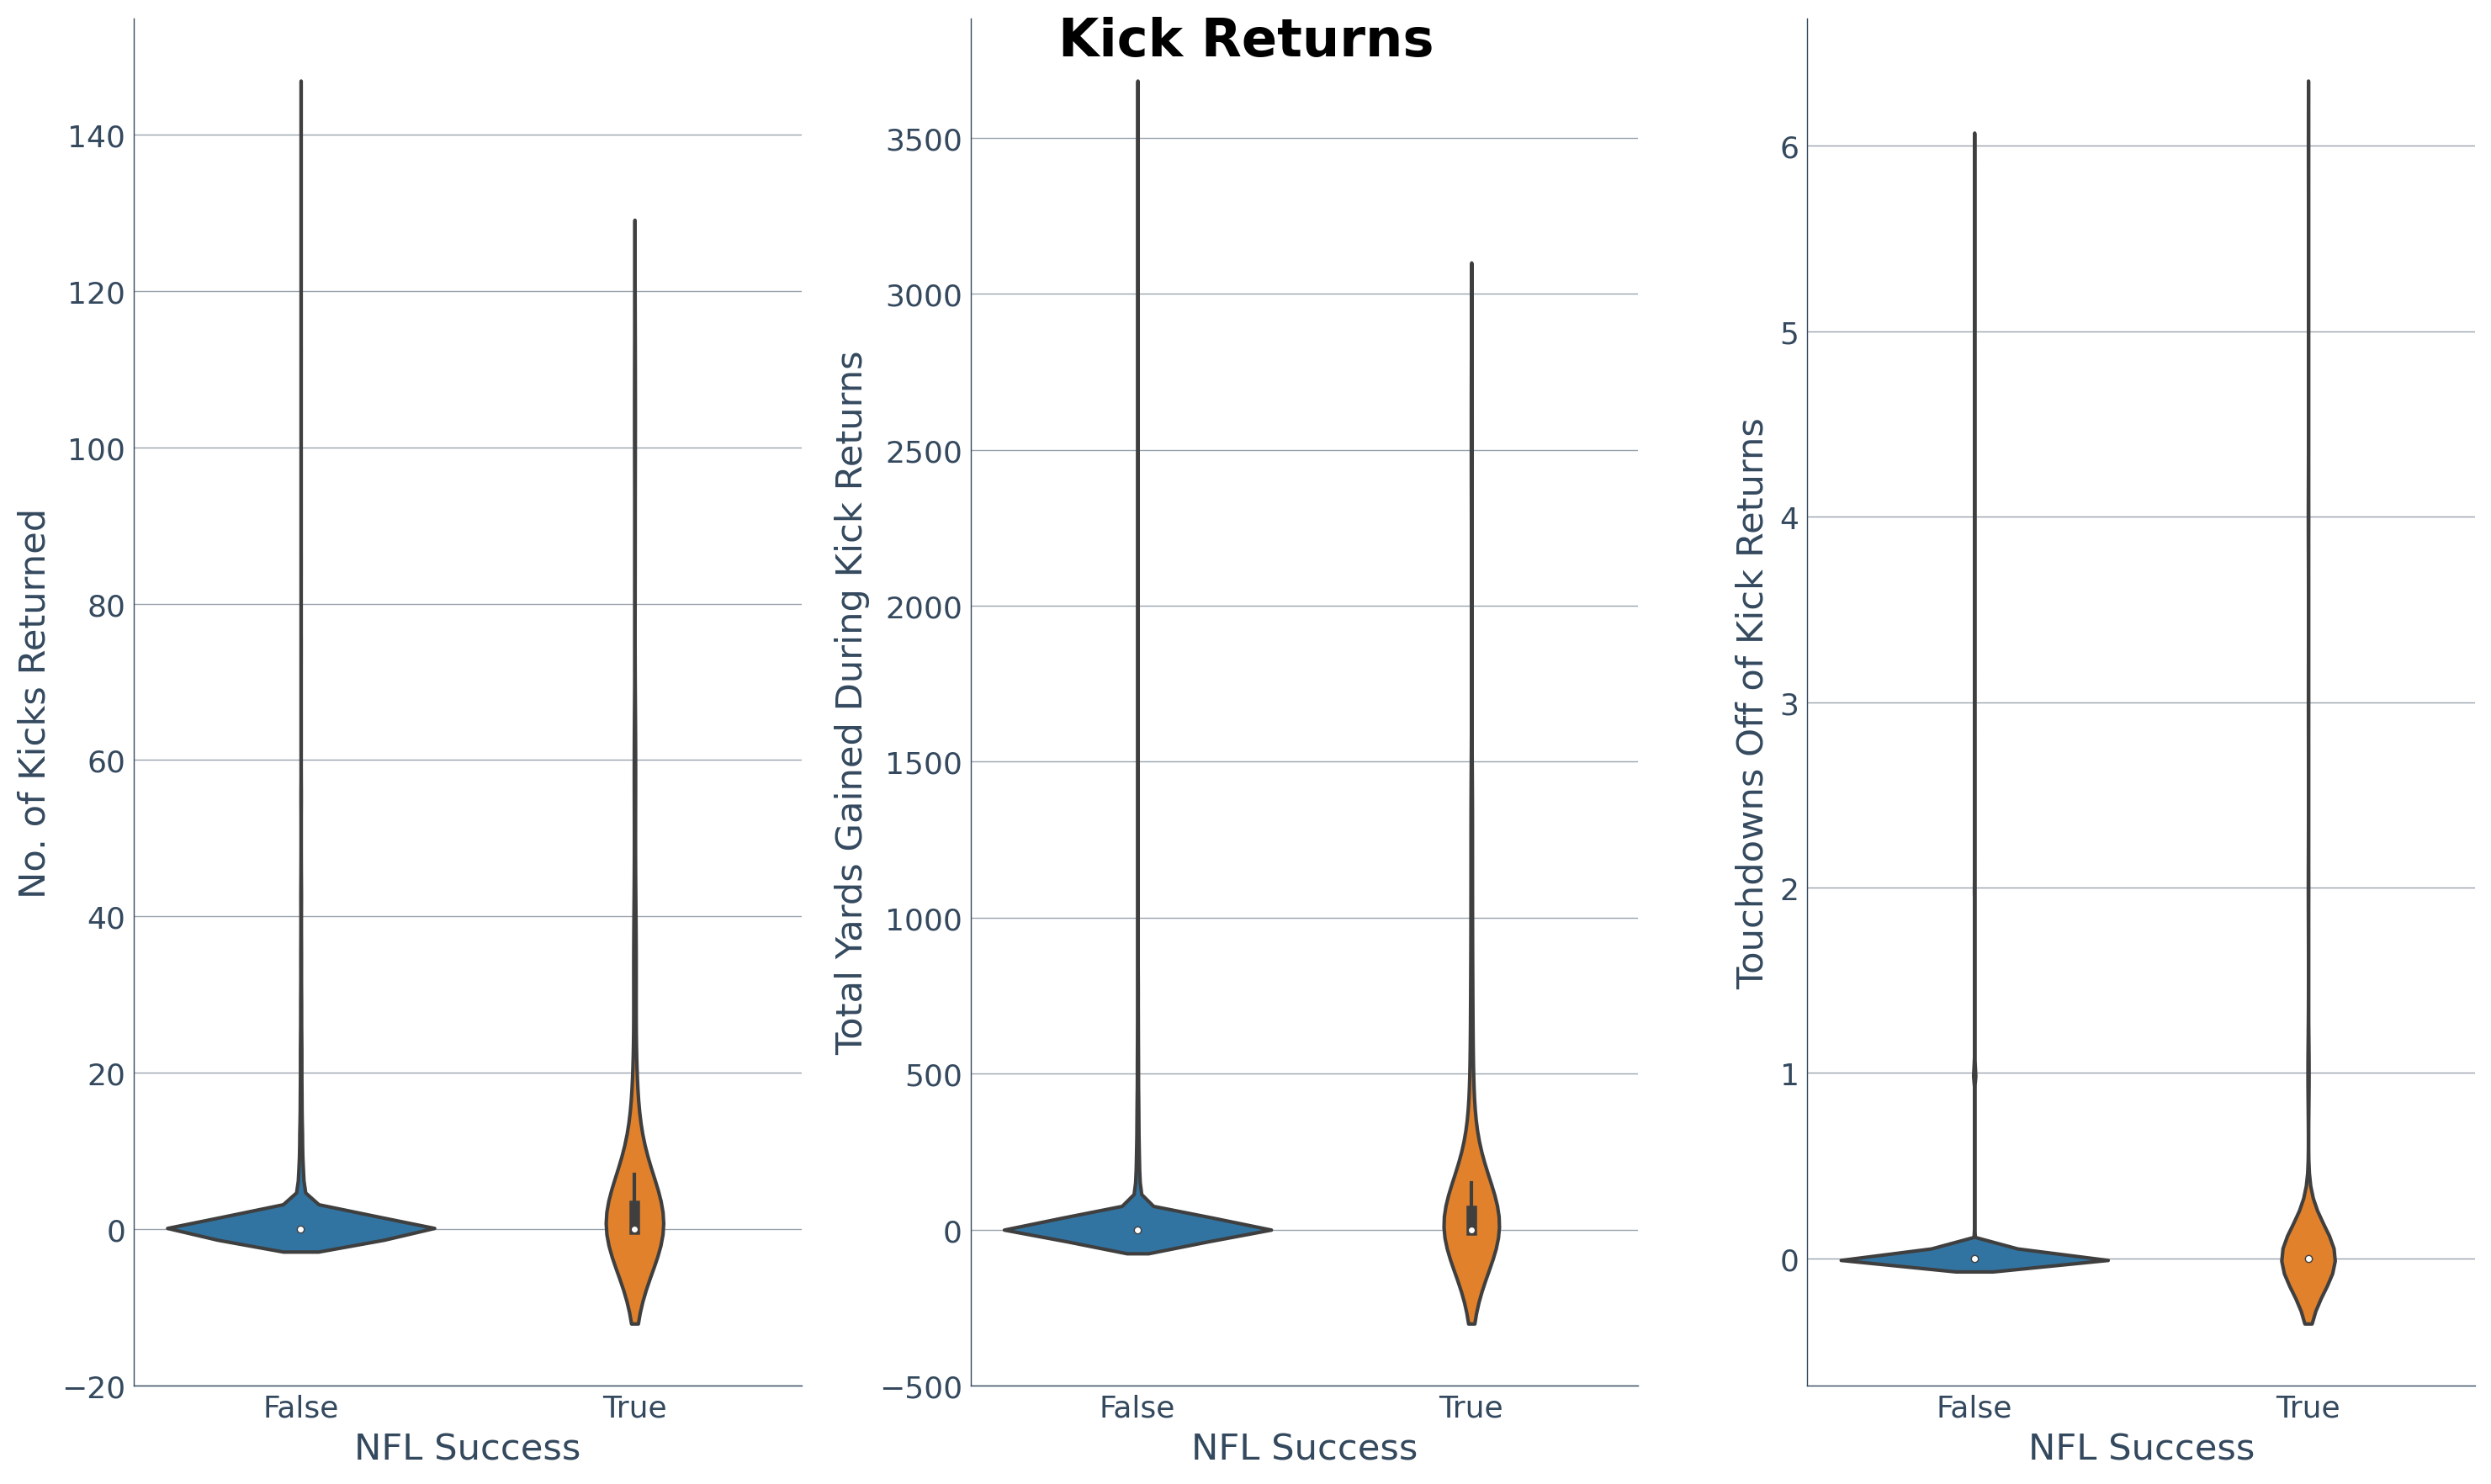

In [17]:
# plot kicks returned
plt.subplot(1,3,1)
sns.violinplot(x='success', y='kick_ret', data=df)
plt.xlabel('NFL Success')
plt.ylabel('No. of Kicks Returned')

# plot yards gained on kick returns
plt.subplot(1,3,2)
sns.violinplot(x='success', y='kick_ret_yards', data=df)
plt.xlabel('NFL Success')
plt.ylabel('Total Yards Gained During Kick Returns')

# plot TDs off of kick returns
plt.subplot(1,3,3)
sns.violinplot(x='success', y='kick_ret_td', data=df)
plt.xlabel('NFL Success')
plt.ylabel('Touchdowns Off of Kick Returns')

plt.tight_layout()
plt.suptitle('Kick Returns');

### __NCAA + Combine Dataset__

Although the number of players involved in this dataset is much smaller, adding the additional features (the results of the combine drills) provided the qualities that could be used to distinguish the successes from the rest of the pack.

A thorough explanation of the Combine drills can be found in this article from [Sporting News](http://www.sportingnews.com/us/nfl/news/nfl-combine-2018-drills-workouts-position-groups-schedule/1troryz9766ll1j4e32tqupugd).

Two of the distinguishing features in the dataset are shown below.

![](05_images/combine_eda_forty.png)

![](05_images/combine_eda_vertical.png)

## __Modeling__

In searching for the best predictive model, the goals, in order of importance, are:

1.  Minimize False Positives: minimizing false positives means that we concentrate our resources on players who are most likely to be successful.

2.  Maximize True Positives:  by identifying as many players who are likely to be successful as possible, we have the widest variety of players from which to choose.

### __NCAA Dataset__

Learning algorithms trained on this dataset provided unsatisfactory results.  There was no single feature or combination of features in this dataset that reliably predicted NFL success.  

The first thing to note is that the dataset in imbalanced.  Less than 5% of the observations were successful.  I used SMOTE to even out the results.  

<div>
  <table>
    <thead>
      <tr>
        <th></th>
        <th>Original Training Dataset</th>
        <th>SMOTEd Training Dataset</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>Successes</td>
        <td>196</td>
        <td>4039</td>
      </tr>
      <tr>
        <td>Total</td>
        <td>4235</td>
        <td>8078</td>
      </tr>
      <tr>
        <td>% Success</td>
        <td>4.6%</td>
        <td>50%</td>
      </tr>
    </tbody>
  </table>
</div>

Even after balancing the training datasets, I did not get useful results.

<div>
  <table>
    <thead>
      <tr>
        <th>Algorithm</th>
        <th>Precision</th>
        <th>Recall</th>
        <th>True Positives</th>
        <th>Tuned Hyperparameters</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>Base (Dummy Classifier)</td>
        <td>7%</td>
        <td>6%</td>
        <td>6</td>
        <td>-</td>
      </tr>
      <tr>
        <td>Base - SMOTEd (Dummy Classifier)</td>
        <td>6%</td>
        <td>52%</td>
        <td>52</td>
        <td>-</td>
      </tr>
      <tr>
        <td>Logistic Regression</td>
        <td>23%</td>
        <td>86%</td>
        <td>86</td>
        <td>penalty: `l2`, C: 0.01</td>
      </tr>
      <tr>
        <td>LinearSVC</td>
        <td>24%</td>
        <td>86%</td>
        <td>86</td>
        <td>C: 1</td>
      </tr>
      <tr>
        <td>Bagging</td>
        <td>24%</td>
        <td>60%</td>
        <td>60</td>
        <td>-</td>
      </tr>
      <tr>
        <td>Keras Classifier</td>
        <td>23%</td>
        <td>63%</td>
        <td>63</td>
        <td>epochs: 10, batch_size: 5, optimizer:'rmsprop'</td>
      </tr>
    </tbody>
  </table>
</div>

#### Confusion Matrix

The best Confuision Matrix was for LinearSVC:

![](05_images/ncaa_linearsvc_cm.png)

### __NCAA + Combine Dataset__

There were far fewer observations in this dataset, but the resulting models were much more predictive.

<div>
  <table>
    <thead>
      <tr>
        <th>Algorithm</th>
        <th>Precision</th>
        <th>Recall</th>
        <th>True Positives</th>
        <th>Tuned Hyperparameters</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>Base (Dummy Classifier)</td>
        <td>57%</td>
        <td>52%</td>
        <td>78</td>
        <td>-</td>
      </tr>
      <tr>
        <td>Logistic Regression</td>
        <td>70%</td>
        <td>71%</td>
        <td>106</td>
        <td>penalty: `l1`, C: 0.1</td>
      </tr>
      <tr>
        <td>LinearSVC</td>
        <td>72%</td>
        <td>74%</td>
        <td>110</td>
        <td>C: 0.001</td>
      </tr>
      <tr>
        <td>Neural Net</td>
        <td>71%</td>
        <td>73%</td>
        <td>109</td>
        <td>epochs: 10, batch_size: 5, optimizer:'rmsprop'</td>
      </tr>
      <tr>
        <td>XGBoost</td>
        <td>86%</td>
        <td>83%</td>
        <td>124</td>
        <td>colsample_bytree: 1.0, gamma: 0, learning_rate: 0.0001, max_depth: 4, n_estimators: 1000, subsample: 0.25</td>
      </tr>
    </tbody>
  </table>
</div>

#### Confusion Matrix

Below is the Confusion Matrix for the tuned XGBoost model.

![](05_images/combine_xgb_cm.png)

#### Feature Importance

The feature importance for the tuned XGBoost model shows that the features that the model relied upon most heavily make intuitive sense.

![](05_images/combine_xgb_feature_importance.png)

## __Next Steps__

Based on the results of modeling these two datasets, I have the following recommendations for improving the predictive capabilities of the XGBoost model of the Combine dataset:

1.  get access to cfbstats.com
2.  collect Pro Day data
3.  quantify scouting reports

By adding data from the above-mentioned data sources, we may be able to increase the predictive capabilities of the XGBoost model even further.